In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Ustawienia wizualizacji
sns.set_style('white')
plt.rcParams['figure.figsize'] = (10, 6)

# Komunikat o rozpoczęciu EDA
print("Rozpoczęcie Eksploracyjnej Analizy Danych (EDA)...")


Rozpoczęcie Eksploracyjnej Analizy Danych (EDA)...


In [4]:
# 1. Wczytanie danych
print("\n--- 1. Wczytywanie danych ---")
path = "../../data/processed/NeurIPS/Base.csv"
try:
    df = pd.read_csv(path)
    print("Dane zostały pomyślnie wczytane.")
except FileNotFoundError:
    print("BŁĄD: Plik 'Base.csv' nie został znaleziony. Upewnij się, że plik znajduje się w odpowiednim katalogu.")
    exit()



--- 1. Wczytywanie danych ---
Dane zostały pomyślnie wczytane.


In [5]:
# Wyświetlenie pierwszych kilku wierszy, aby potwierdzić wczytanie
print("\nPierwsze 5 wierszy danych:")
print(df.head())


Pierwsze 5 wierszy danych:
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711   

In [6]:
# Identyfikacja kolumn, gdzie -1 oznacza brak danych, zgodnie z opisem
cols_with_minus_one_missing = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count']
for col in cols_with_minus_one_missing:
    if col in df.columns:
        df[col] = df[col].replace(-1, np.nan)
        print(f"Wartości -1 w kolumnie '{col}' zostały zastąpione przez NaN.")

Wartości -1 w kolumnie 'prev_address_months_count' zostały zastąpione przez NaN.
Wartości -1 w kolumnie 'current_address_months_count' zostały zastąpione przez NaN.
Wartości -1 w kolumnie 'bank_months_count' zostały zastąpione przez NaN.


In [7]:
# 2. Ogólna charakterystyka danych
print("\n--- 2. Ogólna charakterystyka danych ---")
print(f"Liczba obserwacji (próbek): {df.shape[0]}")
print(f"Liczba cech (zmiennych): {df.shape[1]}")
print("\nTypy danych dla poszczególnych cech:")
df.info()


--- 2. Ogólna charakterystyka danych ---
Liczba obserwacji (próbek): 1000000
Liczba cech (zmiennych): 32

Typy danych dla poszczególnych cech:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         287080 non-null   float64
 4   current_address_months_count      995746 non-null   float64
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w            

In [8]:
print("\nOpis poszczególnych cech (nazwy kolumn):")
print(list(df.columns))


Opis poszczególnych cech (nazwy kolumn):
['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'employment_status', 'credit_risk_score', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']


In [9]:
# Podział na cechy numeryczne i kategoryczne na podstawie opisu i typów danych
target_variable = 'fraud_bool'

# Zgodnie z opisem, identyfikacja cech numerycznych i kategorycznych
# (może wymagać dostosowania po wstępnej analizie df.info() i df.dtypes)

# Na podstawie opisu:
numerical_features = [
    'income', 'name_email_similarity', 'prev_address_months_count',
    'current_address_months_count', 'customer_age', 'days_since_request',
    'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
    'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
    'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',
    'session_length_in_minutes', 'device_distinct_emails_8w', 'month'
]
# Usuwamy cechy, które mogły nie zostać wczytane, jeśli plik CSV miałby inny zestaw kolumn
numerical_features = [col for col in numerical_features if col in df.columns]

categorical_features = [
    'payment_type', 'employment_status', 'email_is_free', 'housing_status',
    'phone_home_valid', 'phone_mobile_valid', 'has_other_cards',
    'foreign_request', 'source', 'device_os', 'keep_alive_session'
    # device_fraud_count jest [0,1], traktujemy jako kategoryczną
]
categorical_features = [col for col in categorical_features if col in df.columns]

# Sprawdzenie, czy wszystkie kolumny (poza targetem) zostały przypisane
all_features_identified = set(numerical_features) | set(categorical_features)
all_columns_in_df = set(df.columns) - {target_variable}
unassigned_cols = all_columns_in_df - all_features_identified
if unassigned_cols:
    print(f"\nUWAGA: Nieprzypisane kolumny: {unassigned_cols}. Sprawdź ich typ i dodaj do odpowiedniej listy.")



UWAGA: Nieprzypisane kolumny: {'device_fraud_count'}. Sprawdź ich typ i dodaj do odpowiedniej listy.


In [10]:
# Konwersja typów dla pewności (szczególnie dla cech kategorycznych, które pandas mógł odczytać jako liczbowe)
for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("\nStatystyki opisowe dla cech numerycznych (globalnie):")
print(df[numerical_features].describe().transpose())

print("\nLiczba unikalnych wartości dla cech kategorycznych (globalnie):")
for col in categorical_features:
    if col in df.columns:
        print(
            f"- {col}: {df[col].nunique()} ({df[col].unique()[:5].tolist()}...)")  # Pokaż pierwsze 5 unikalnych wartości



Statystyki opisowe dla cech numerycznych (globalnie):
                                      count         mean          std  \
income                            1000000.0     0.562696     0.290343   
name_email_similarity             1000000.0     0.493694     0.289125   
prev_address_months_count          287080.0    60.719967    63.578187   
current_address_months_count       995746.0    86.962058    88.409289   
customer_age                      1000000.0    33.689080    12.025799   
days_since_request                1000000.0     1.025705     5.381835   
intended_balcon_amount            1000000.0     8.661499    20.236155   
zip_count_4w                      1000000.0  1572.692049  1005.374565   
velocity_6h                       1000000.0  5665.296605  3009.380665   
velocity_24h                      1000000.0  4769.781965  1479.212612   
velocity_4w                       1000000.0  4856.324016   919.843934   
bank_branch_count_8w              1000000.0   184.361849   459.625329


--- 3. Analiza Zmiennej Celu: 'fraud_bool' ---
Zmienna celu: 'fraud_bool'
Klasy: 0 - transakcja legalna, 1 - oszustwo

Rozkład klas:
Liczebność klas:
fraud_bool
0    988971
1     11029
Name: count, dtype: int64

Procentowy udział klas:
fraud_bool
0    98.8971
1     1.1029
Name: proportion, dtype: float64


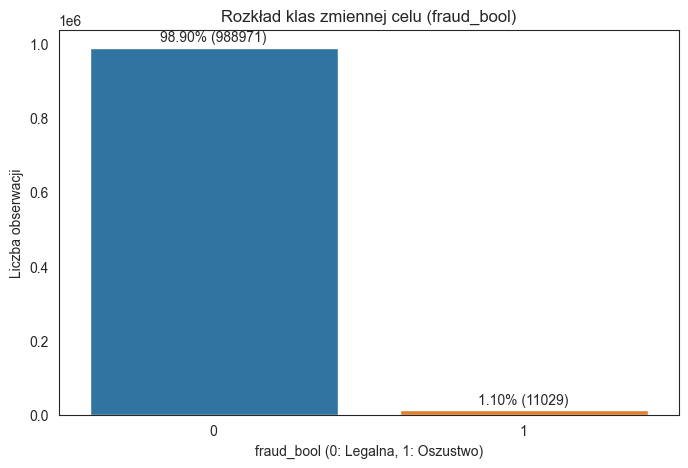


Problem jest niezbalansowany. Klasa mniejszościowa stanowi znacznie mniejszy odsetek.
Implikacje: Należy rozważyć techniki radzenia sobie z niezbalansowanymi danymi, takie jak oversampling, undersampling, SMOTE, lub użycie odpowiednich metryk oceny (np. F1-score, AUC-PR).


In [11]:
# 3. Analiza Zmiennej Celu (Target Variable: fraud_bool)
print(f"\n--- 3. Analiza Zmiennej Celu: '{target_variable}' ---")
if target_variable not in df.columns:
    print(f"BŁĄD: Zmienna celu '{target_variable}' nie została znaleziona w danych.")
else:
    print(f"Zmienna celu: '{target_variable}'")
    print("Klasy: 0 - transakcja legalna, 1 - oszustwo")

    class_counts = df[target_variable].value_counts()
    class_percentages = df[target_variable].value_counts(normalize=True) * 100

    print("\nRozkład klas:")
    print("Liczebność klas:")
    print(class_counts)
    print("\nProcentowy udział klas:")
    print(class_percentages)

    plt.figure(figsize=(8, 5))
    sns.countplot(x=target_variable, data=df, hue=target_variable, legend=False)
    plt.title(f'Rozkład klas zmiennej celu ({target_variable})')
    plt.xlabel(f'{target_variable} (0: Legalna, 1: Oszustwo)')
    plt.ylabel('Liczba obserwacji')
    # Dodanie adnotacji procentowych
    for i, count in enumerate(class_counts):
        percentage = class_percentages.iloc[i]
        plt.text(i, count + (0.01 * df.shape[0]), f'{percentage:.2f}% ({count})', ha='center', va='bottom')
    plt.show()

    if abs(class_percentages.get(0, 0) - class_percentages.get(1, 0)) > 30:  # Próg np. 65/35
        print("\nProblem jest niezbalansowany. Klasa mniejszościowa stanowi znacznie mniejszy odsetek.")
        print(
            "Implikacje: Należy rozważyć techniki radzenia sobie z niezbalansowanymi danymi, takie jak oversampling, undersampling, SMOTE, lub użycie odpowiednich metryk oceny (np. F1-score, AUC-PR).")
    else:
        print("\nProblem wydaje się być stosunkowo zbalansowany lub lekko niezbalansowany.")

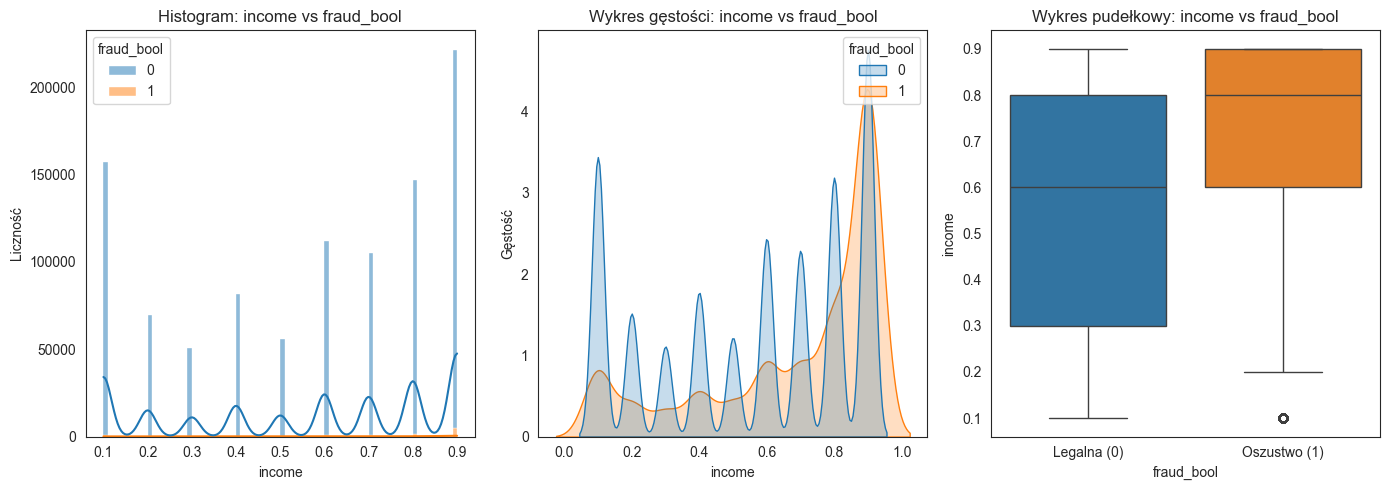

In [12]:

plt.figure(figsize=(14, 5))
col = "income"
# Histogramy
plt.subplot(1, 3, 1)
sns.histplot(data=df, x=col, hue=target_variable, kde=True, multiple="stack")
plt.title(f'Histogram: {col} vs {target_variable}')
plt.ylabel("Liczność")

# Wykresy gęstości
plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x=col, hue=target_variable, fill=True, common_norm=False)
plt.title(f'Wykres gęstości: {col} vs {target_variable}')
plt.ylabel("Gęstość")

# Box-ploty
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x=target_variable, y=col, hue=target_variable, legend=False)
plt.title(f'Wykres pudełkowy: {col} vs {target_variable}')
plt.xticks([0, 1], ['Legalna (0)', 'Oszustwo (1)'])

plt.tight_layout()
plt.show()


--- 4. Analiza Poszczególnych Cech w Kontekście Zmiennej Celu ('fraud_bool') ---

Analiza cech numerycznych:

Cecha numeryczna: income
Statystyki opisowe:
               count      mean       std  min  25%  50%  75%  max
fraud_bool                                                       
0           988971.0  0.561313  0.290309  0.1  0.3  0.6  0.8  0.9
1            11029.0  0.686635  0.265579  0.1  0.6  0.8  0.9  0.9


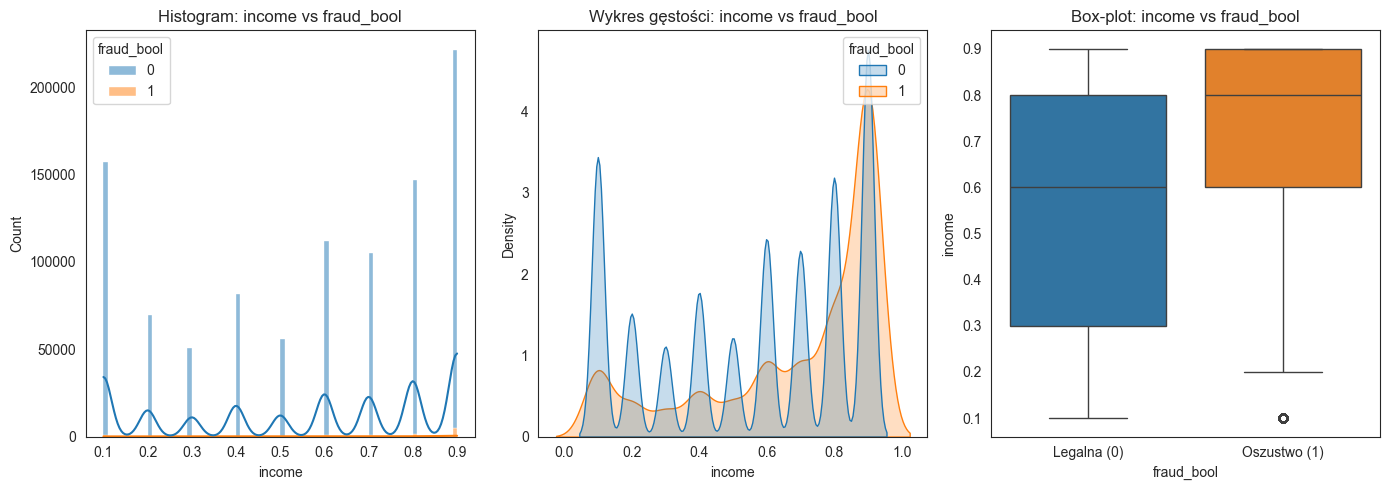

--------------------------------------------------

Cecha numeryczna: name_email_similarity
Statystyki opisowe:
               count      mean       std       min       25%       50%  \
fraud_bool                                                               
0           988971.0  0.494815  0.288855  0.000001  0.226963  0.493571   
1            11029.0  0.393161  0.295607  0.000132  0.134257  0.292420   

                 75%       max  
fraud_bool                      
0           0.756211  0.999999  
1           0.676543  0.999953  


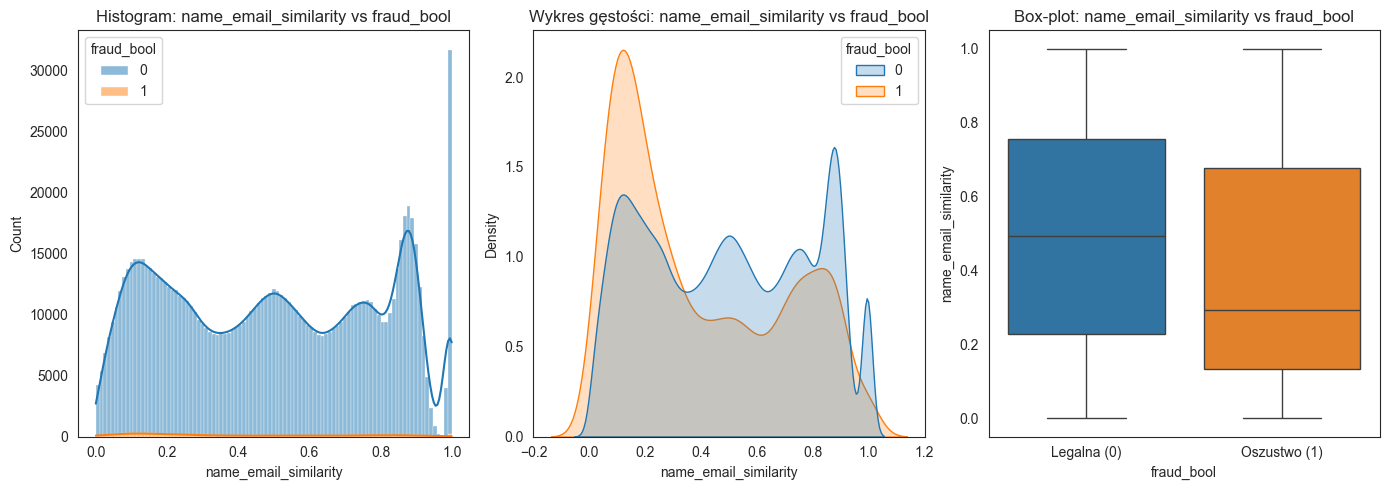

--------------------------------------------------

Cecha numeryczna: prev_address_months_count
Statystyki opisowe:
               count       mean        std  min   25%   50%    75%    max
fraud_bool                                                               
0           286185.0  60.648563  63.499883  5.0  25.0  34.0   71.0  383.0
1              895.0  83.551955  81.905955  8.0  28.0  53.0  106.0  357.0


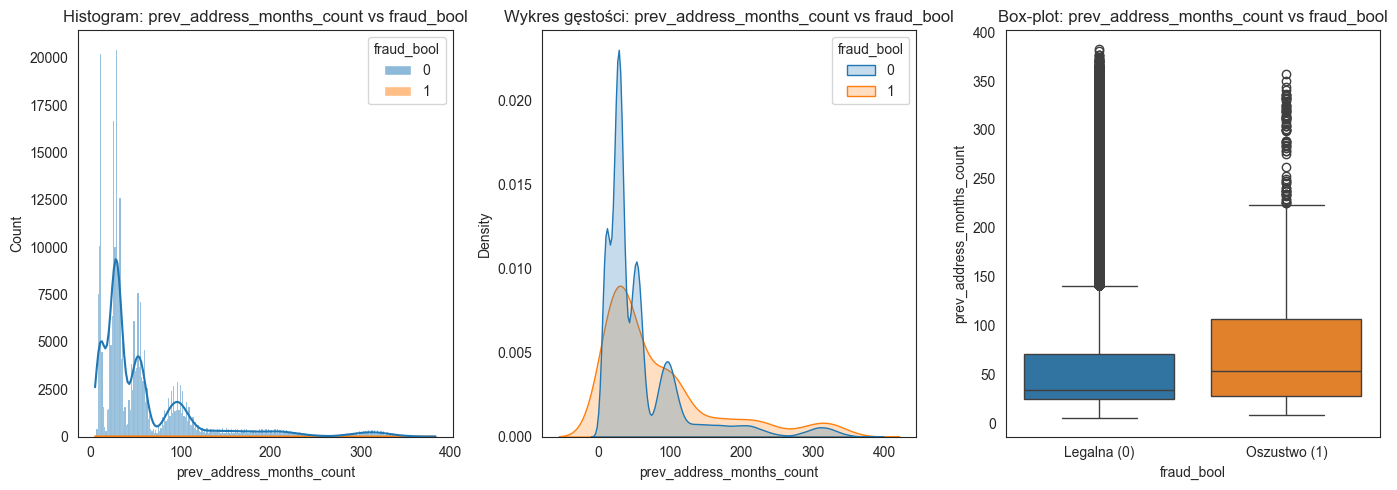

--------------------------------------------------

Cecha numeryczna: current_address_months_count
Statystyki opisowe:
               count        mean        std  min   25%   50%    75%    max
fraud_bool                                                                
0           984731.0   86.649009  88.393626  0.0  20.0  52.0  130.0  428.0
1            11015.0  114.948343  85.278554  0.0  53.0  94.0  157.0  392.0


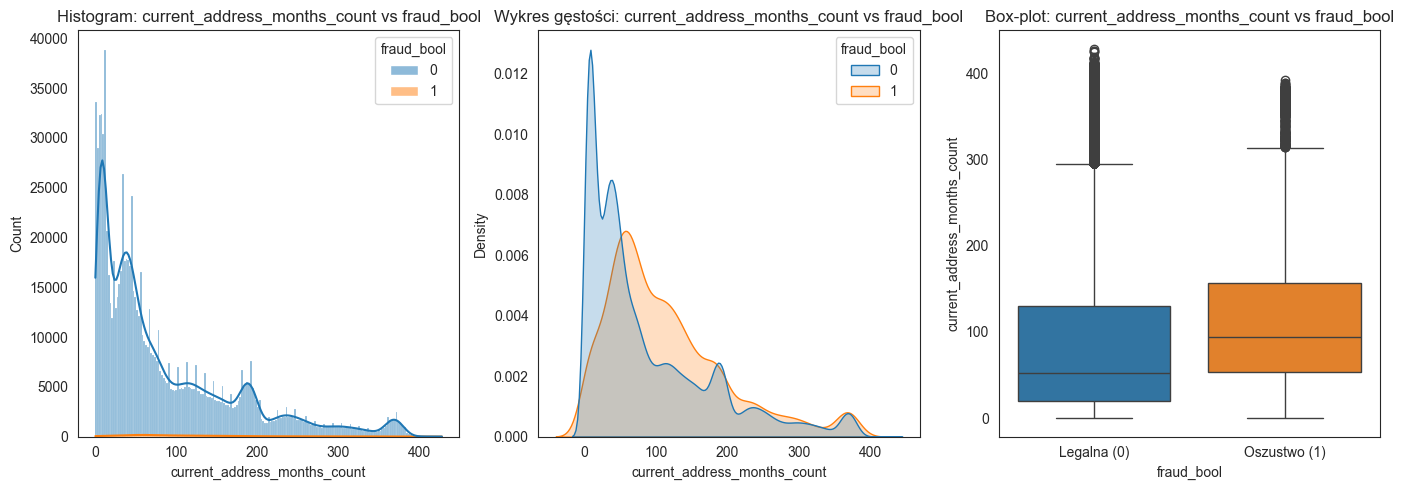

--------------------------------------------------

Cecha numeryczna: customer_age
Statystyki opisowe:
               count       mean        std   min   25%   50%   75%   max
fraud_bool                                                              
0           988971.0  33.609125  11.989302  10.0  20.0  30.0  40.0  90.0
1            11029.0  40.858645  13.086334  10.0  30.0  40.0  50.0  90.0


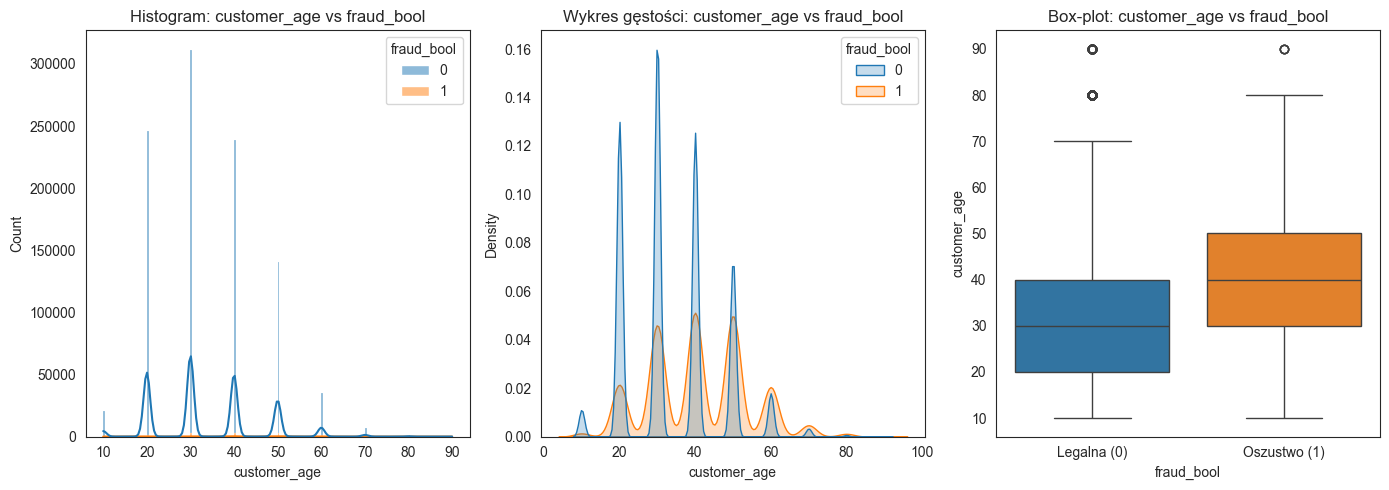

--------------------------------------------------

Cecha numeryczna: days_since_request
Statystyki opisowe:
               count      mean       std           min       25%       50%  \
fraud_bool                                                                   
0           988971.0  1.025383  5.378088  4.036860e-09  0.007209  0.015203   
1            11029.0  1.054615  5.707977  1.013114e-06  0.005911  0.013094   

                 75%        max  
fraud_bool                       
0           0.026361  78.456904  
1           0.023265  75.495921  

Cecha numeryczna: intended_balcon_amount
Statystyki opisowe:
               count      mean        std        min       25%       50%  \
fraud_bool                                                                 
0           988971.0  8.713907  20.266690 -15.530555 -1.181296 -0.829552   
1            11029.0  3.962009  16.622067  -8.249792 -1.195618 -0.900578   

                 75%         max  
fraud_bool                        
0    

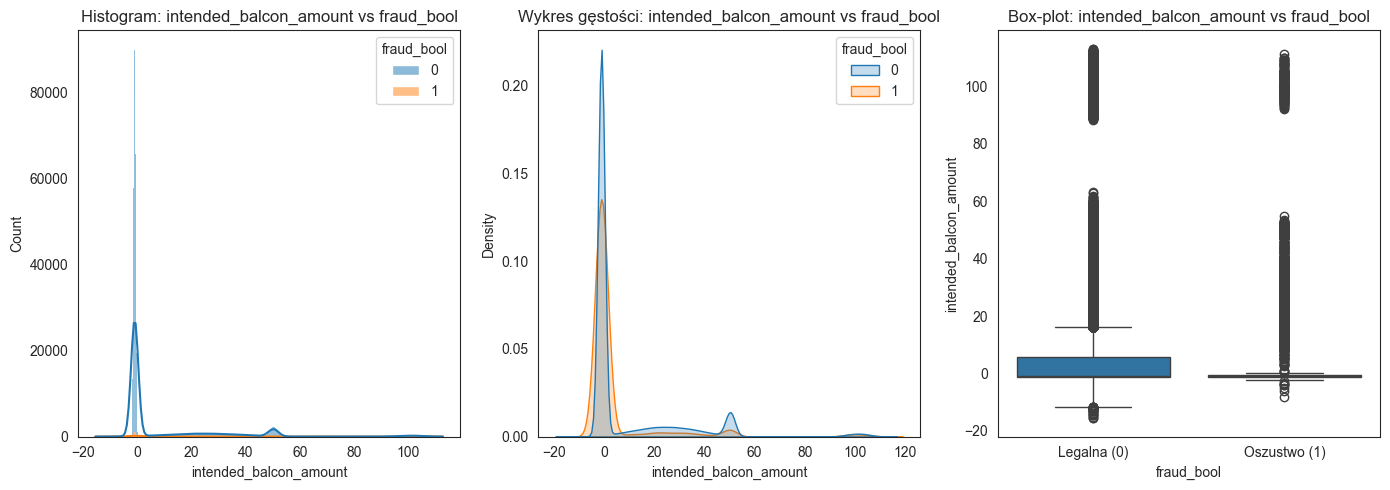

--------------------------------------------------

Cecha numeryczna: zip_count_4w
Statystyki opisowe:
               count         mean          std   min    25%     50%     75%  \
fraud_bool                                                                    
0           988971.0  1572.138693  1005.357780   1.0  894.0  1262.0  1943.0   
1            11029.0  1622.311542  1005.687071  18.0  909.0  1328.0  2050.0   

               max  
fraud_bool          
0           6700.0  
1           6368.0  


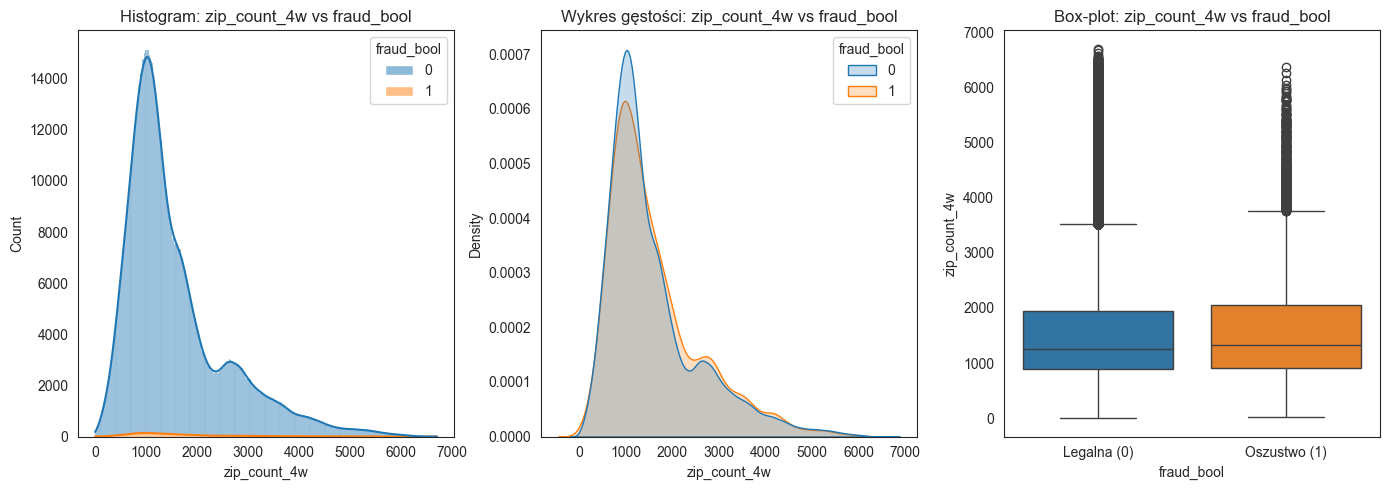

--------------------------------------------------

Cecha numeryczna: velocity_6h
Statystyki opisowe:
               count         mean          std         min          25%  \
fraud_bool                                                                
0           988971.0  5670.664988  3010.120768 -170.603072  3441.756464   
1            11029.0  5183.913444  2902.298679   64.422571  2894.349366   

                    50%          75%           max  
fraud_bool                                          
0           5324.540439  7686.405675  16715.565404  
1           4916.464728  7128.603281  16084.617170  


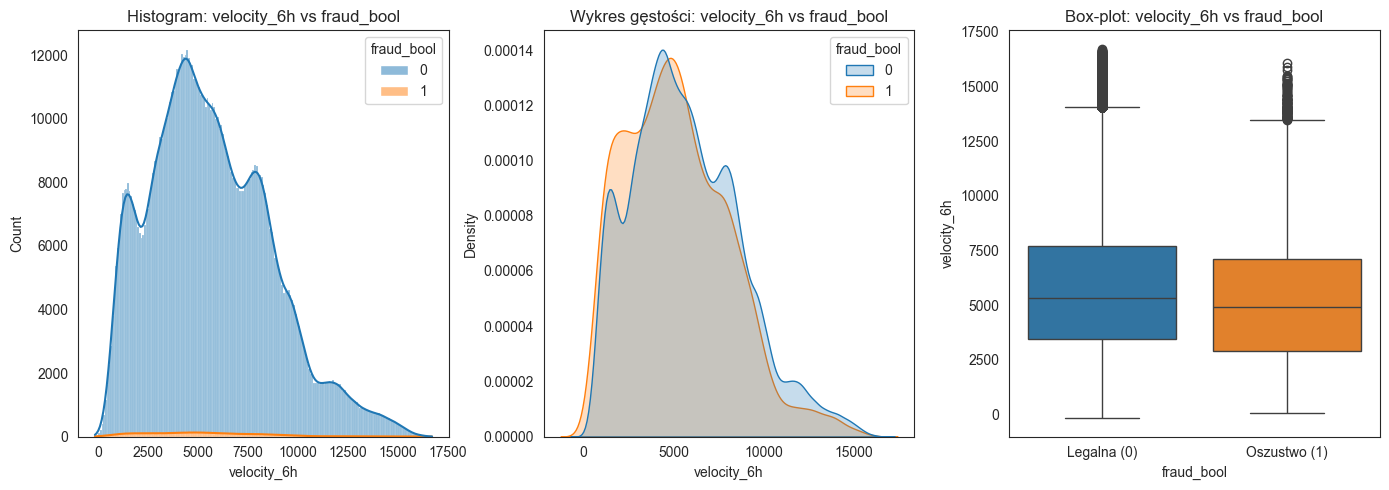

--------------------------------------------------

Cecha numeryczna: velocity_24h
Statystyki opisowe:
               count         mean          std          min          25%  \
fraud_bool                                                                 
0           988971.0  4771.528849  1479.588964  1300.307314  3594.967983   
1            11029.0  4613.138798  1436.521551  1440.568313  3387.940196   

                    50%          75%          max  
fraud_bool                                         
0           4751.027067  5754.617232  9506.896596  
1           4665.725851  5583.593254  9307.012145  


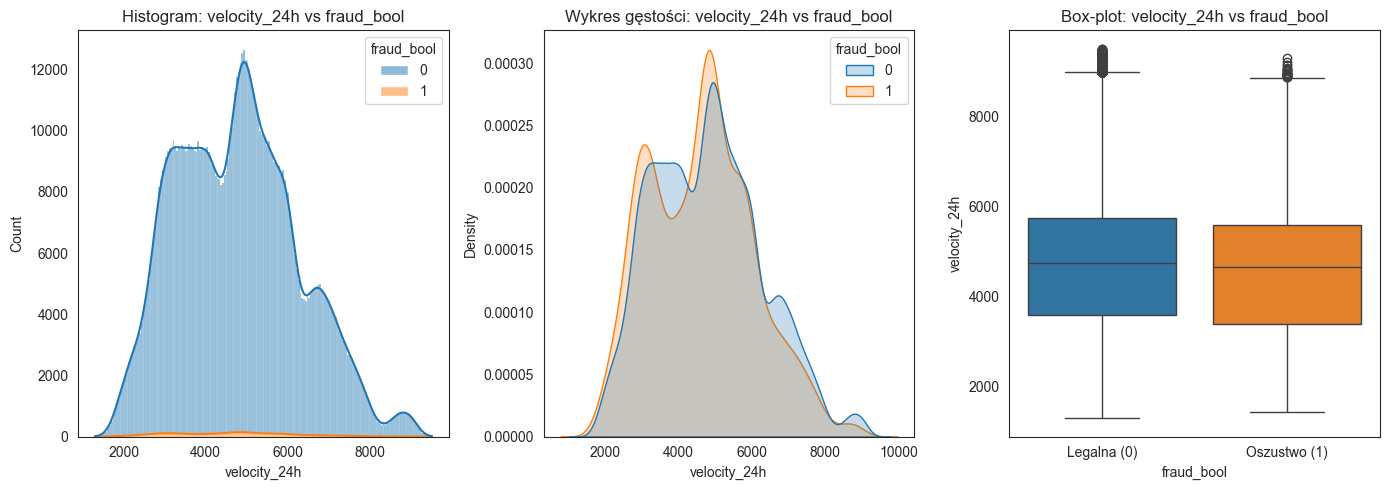

--------------------------------------------------

Cecha numeryczna: velocity_4w
Statystyki opisowe:
               count         mean         std          min          25%  \
fraud_bool                                                                
0           988971.0  4857.444566  919.140920  2825.748405  4269.163180   
1            11029.0  4755.844185  975.663156  2863.783336  4192.268272   

                    50%          75%          max  
fraud_bool                                         
0           4914.578888  5488.585904  6994.764201  
1           4827.695220  5415.337590  6889.977775  


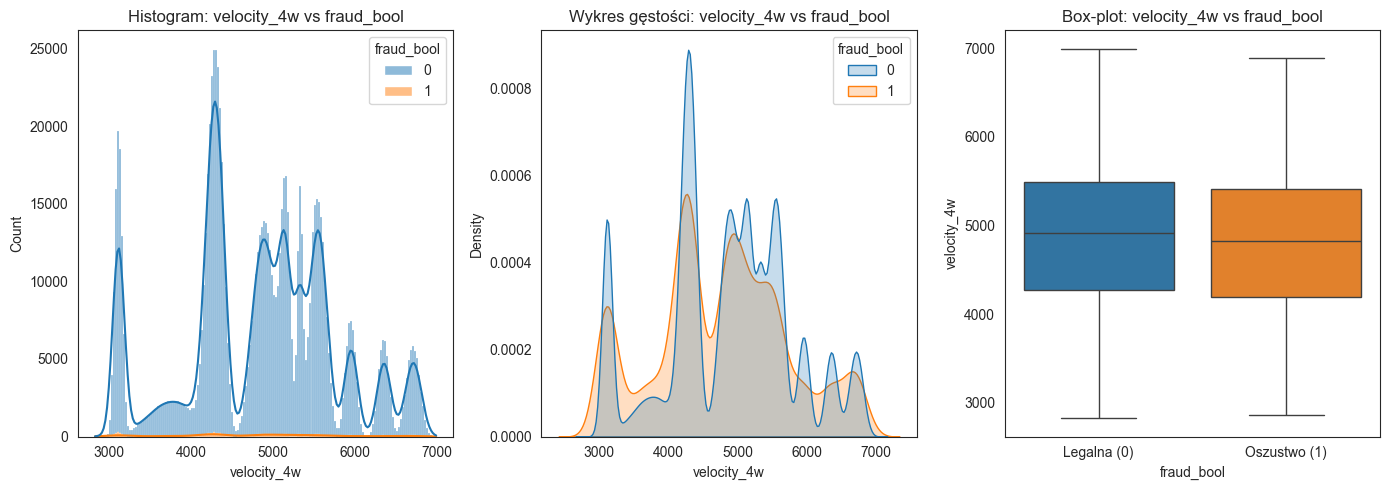

--------------------------------------------------

Cecha numeryczna: bank_branch_count_8w
Statystyki opisowe:
               count        mean         std  min  25%  50%   75%     max
fraud_bool                                                               
0           988971.0  184.923747  460.054059  0.0  1.0  9.0  26.0  2385.0
1            11029.0  133.976426  416.350611  0.0  1.0  2.0  15.0  2266.0


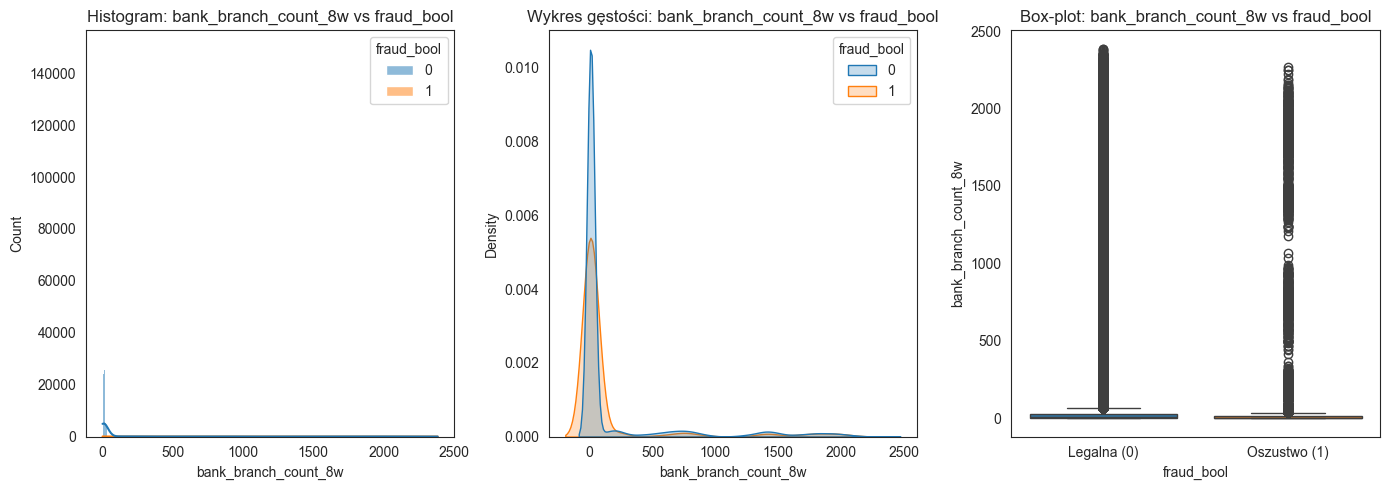

--------------------------------------------------

Cecha numeryczna: date_of_birth_distinct_emails_4w
Statystyki opisowe:
               count      mean       std  min  25%  50%   75%   max
fraud_bool                                                         
0           988971.0  9.526521  5.031063  0.0  6.0  9.0  13.0  39.0
1            11029.0  7.443195  4.848911  0.0  4.0  7.0  10.0  36.0


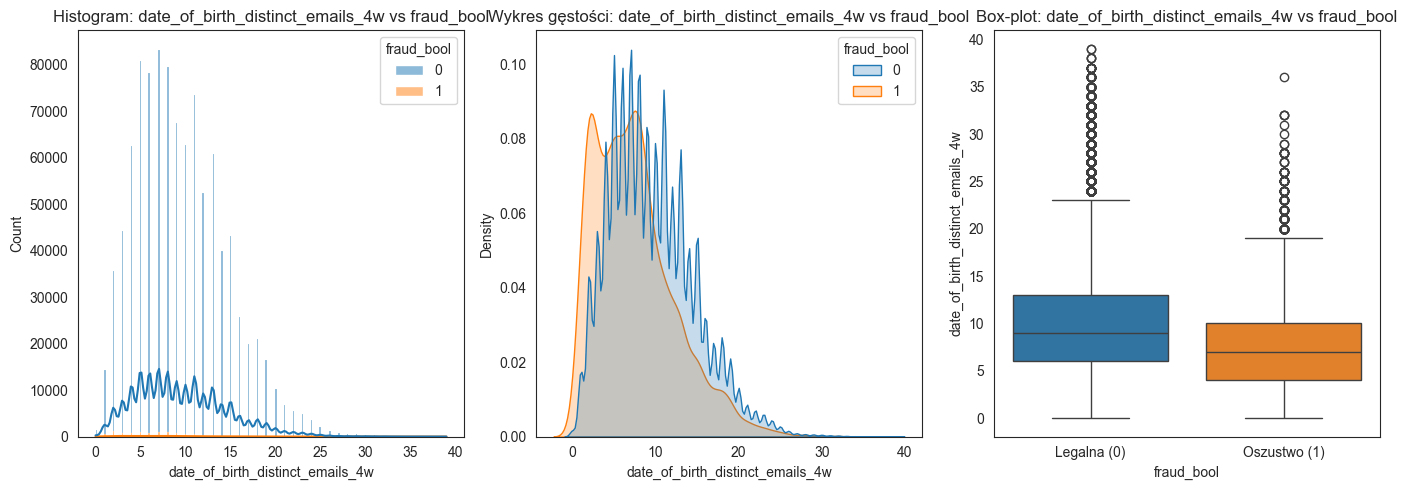

--------------------------------------------------

Cecha numeryczna: credit_risk_score
Statystyki opisowe:
               count        mean        std    min    25%    50%    75%    max
fraud_bool                                                                    
0           988971.0  130.469904  69.357052 -170.0   83.0  122.0  177.0  389.0
1            11029.0  177.590353  81.910348  -97.0  112.0  178.0  240.0  378.0


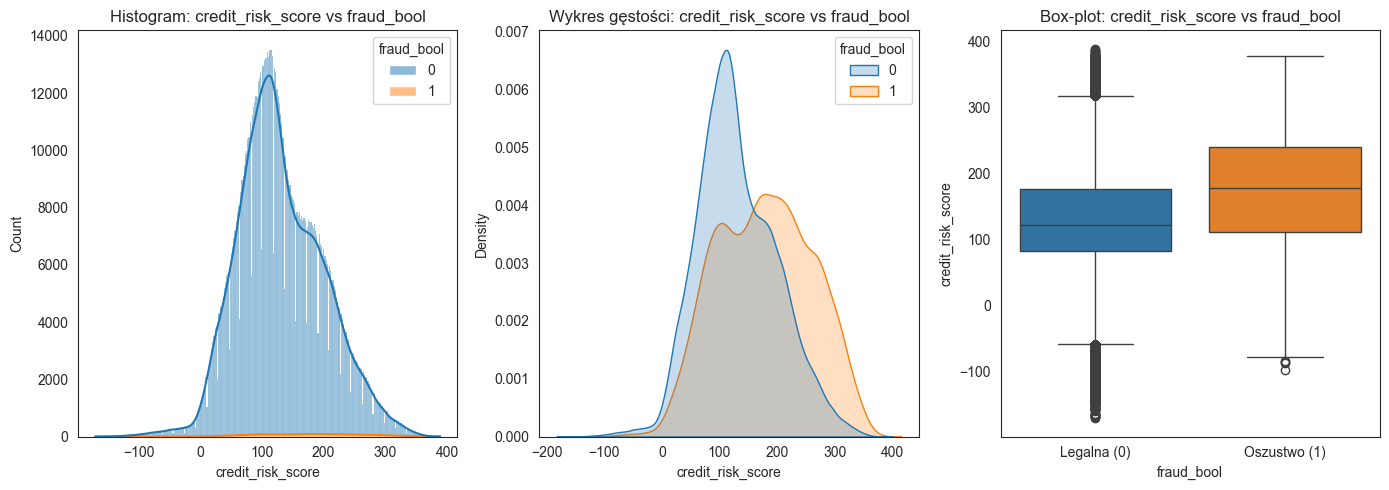

--------------------------------------------------

Cecha numeryczna: bank_months_count
Statystyki opisowe:
               count       mean        std  min  25%   50%   75%   max
fraud_bool                                                            
0           739476.0  14.839331  11.522897  1.0  1.0  15.0  28.0  32.0
1             6889.0  17.362317  11.783641  1.0  4.0  20.0  28.0  31.0


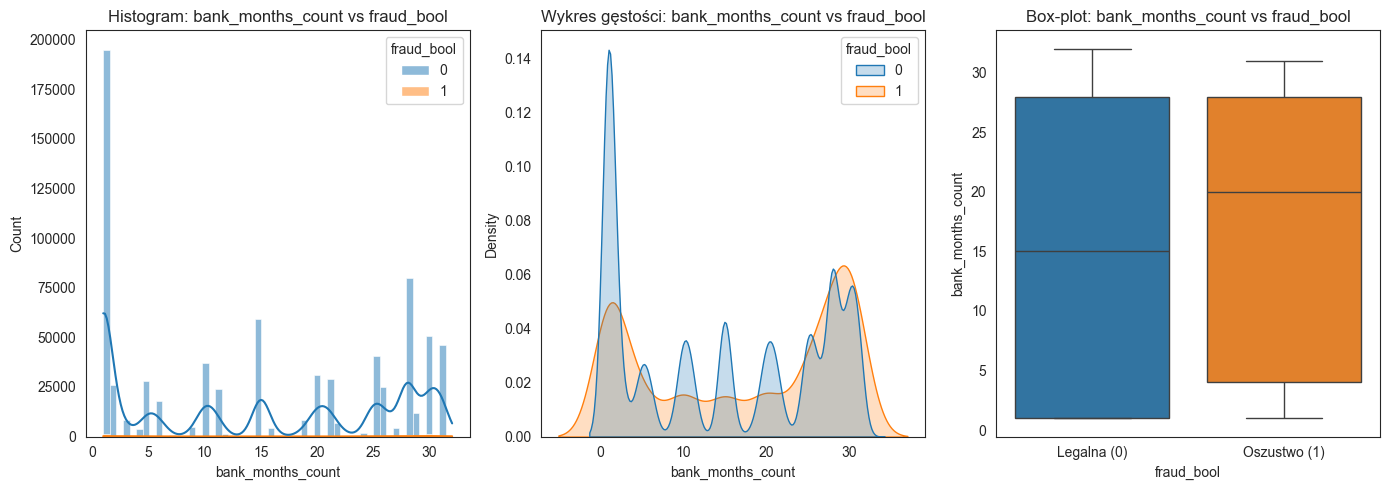

--------------------------------------------------

Cecha numeryczna: proposed_credit_limit
Statystyki opisowe:
               count        mean         std    min    25%    50%     75%  \
fraud_bool                                                                  
0           988971.0  512.303162  484.365435  190.0  200.0  200.0   500.0   
1            11029.0  833.986762  643.287556  190.0  200.0  500.0  1500.0   

               max  
fraud_bool          
0           2100.0  
1           2100.0  


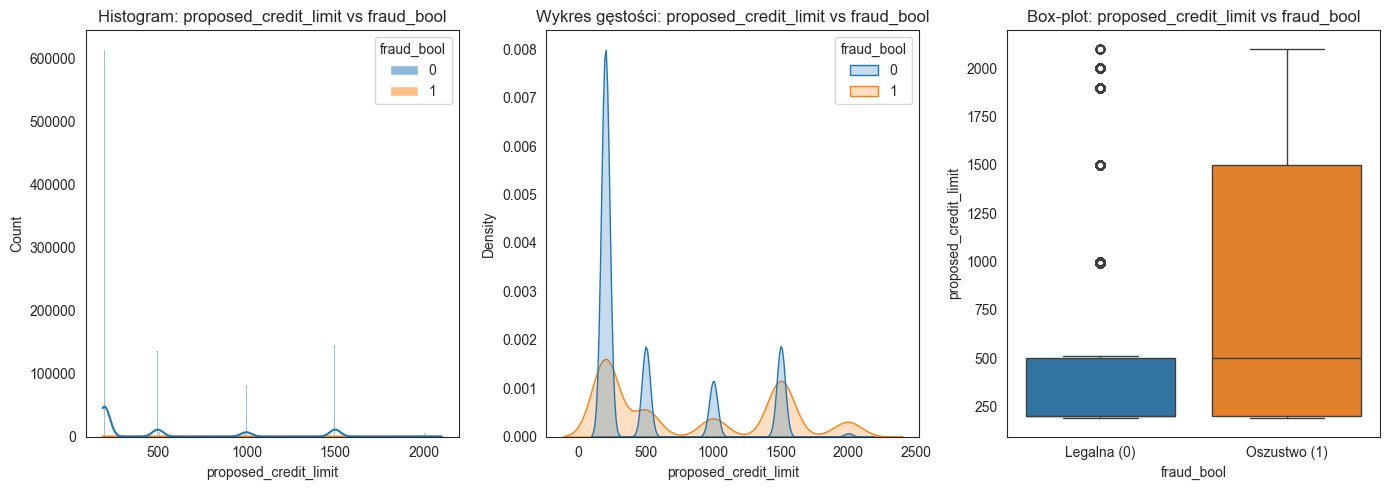

--------------------------------------------------

Cecha numeryczna: session_length_in_minutes
Statystyki opisowe:
               count      mean       std  min       25%       50%       75%  \
fraud_bool                                                                    
0           988971.0  7.537306  8.012493 -1.0  3.101249  5.114289  8.868895   
1            11029.0  8.229520  9.681103 -1.0  3.249171  5.121820  8.628160   

                  max  
fraud_bool             
0           85.899143  
1           77.730242  


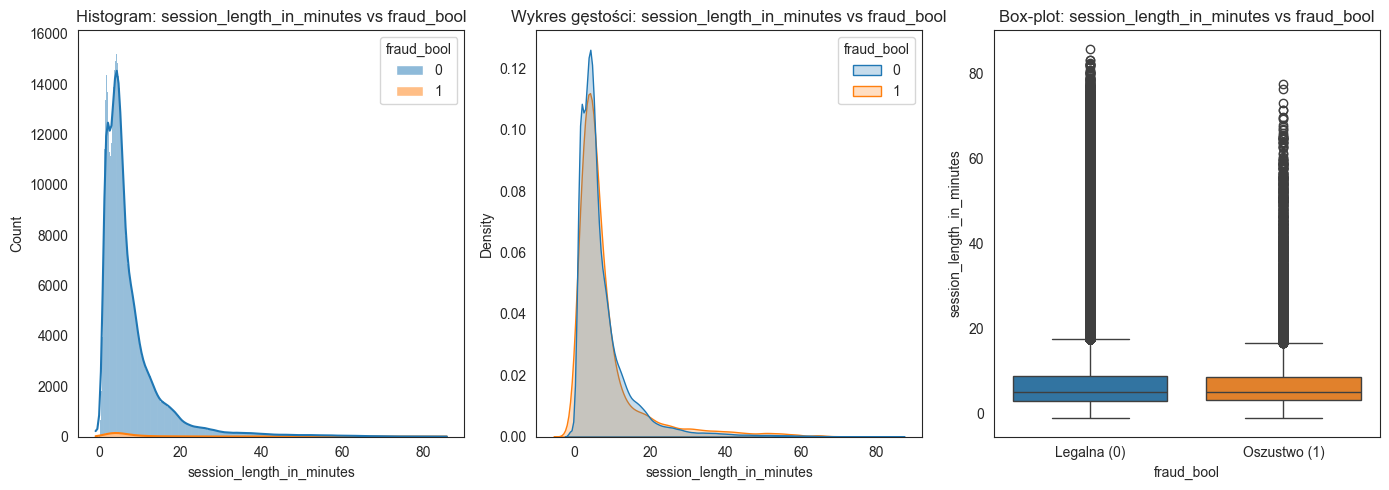

--------------------------------------------------

Cecha numeryczna: device_distinct_emails_8w
Statystyki opisowe:
               count      mean       std  min  25%  50%  75%  max
fraud_bool                                                       
0           988971.0  1.017630  0.178471 -1.0  1.0  1.0  1.0  2.0
1            11029.0  1.079427  0.320447 -1.0  1.0  1.0  1.0  2.0


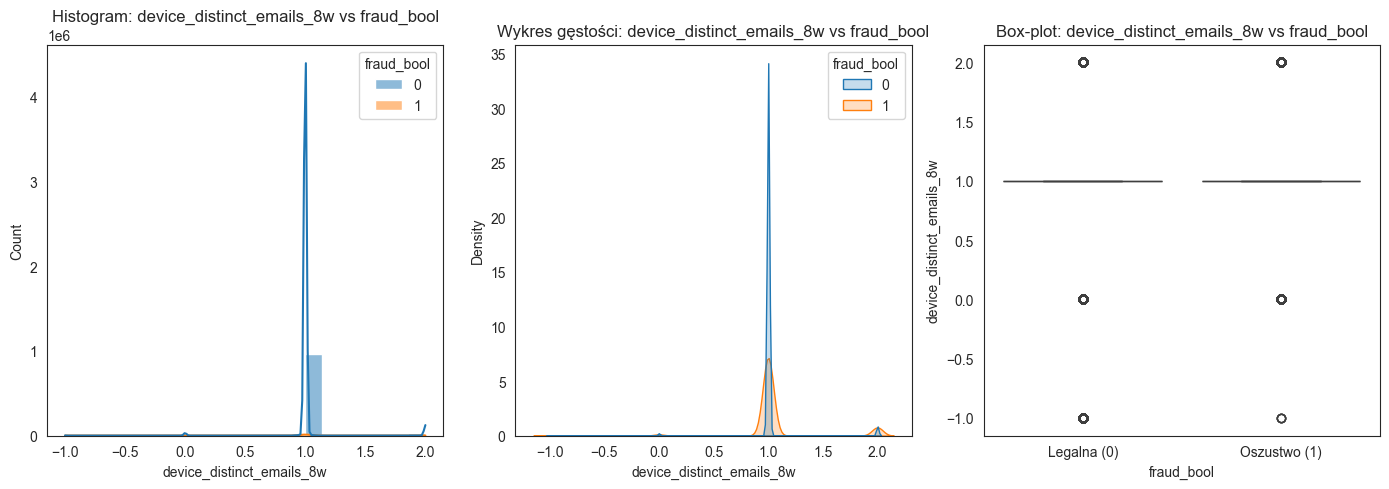

--------------------------------------------------

Cecha numeryczna: month
Statystyki opisowe:
               count      mean       std  min  25%  50%  75%  max
fraud_bool                                                       
0           988971.0  3.285582  2.208634  0.0  1.0  3.0  5.0  7.0
1            11029.0  3.565962  2.312055  0.0  2.0  4.0  6.0  7.0


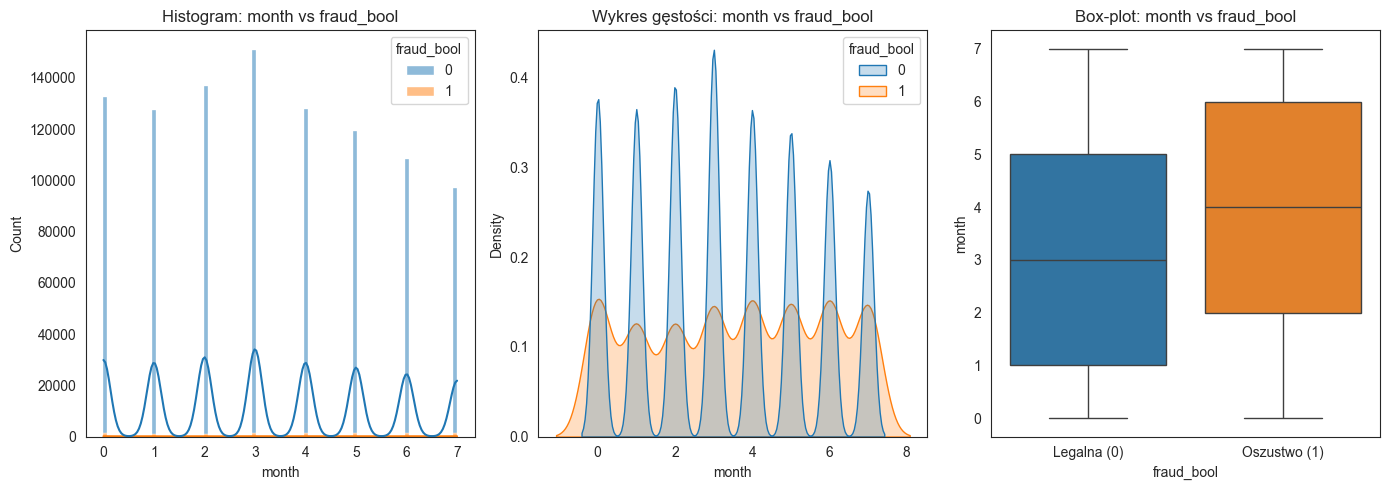

--------------------------------------------------

Analiza cech kategorycznych:

Cecha kategoryczna: payment_type
Tabele liczebności (globalnie):
payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64

Tabele liczebności dla 'payment_type' vs 'fraud_bool':
fraud_bool         0     1
payment_type              
AA            256885  1364
AB            366385  4169
AC            247862  4209
AD            117551  1286
AE               288     1


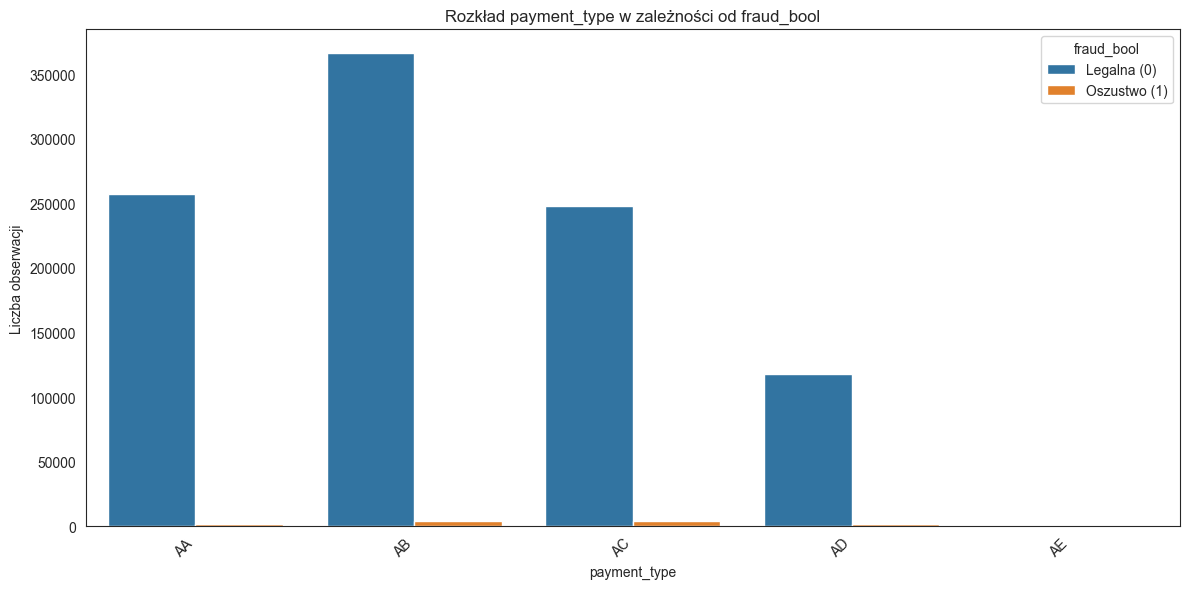

--------------------------------------------------

Cecha kategoryczna: employment_status
Tabele liczebności (globalnie):
employment_status
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: count, dtype: int64

Tabele liczebności dla 'employment_status' vs 'fraud_bool':
fraud_bool              0     1
employment_status              
CA                 721353  8899
CB                 137335   953
CC                  36826   932
CD                  26422   100
CE                  22640    53
CF                  43949    85
CG                    446     7


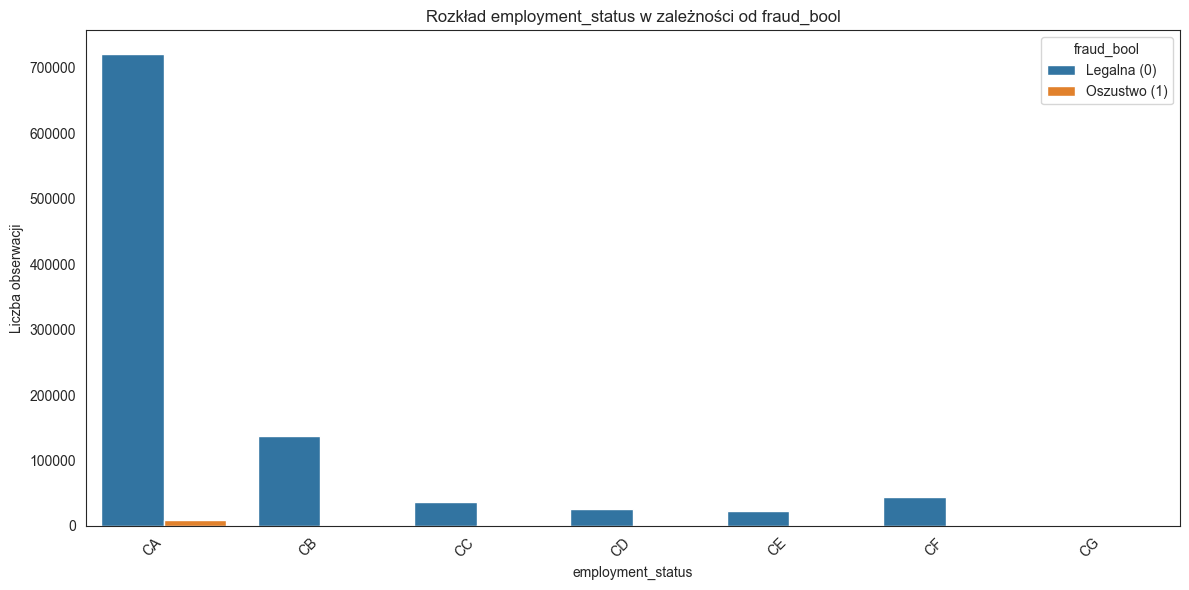

--------------------------------------------------

Cecha kategoryczna: email_is_free
Tabele liczebności (globalnie):
email_is_free
1    529886
0    470114
Name: count, dtype: int64

Tabele liczebności dla 'email_is_free' vs 'fraud_bool':
fraud_bool          0     1
email_is_free              
0              466376  3738
1              522595  7291


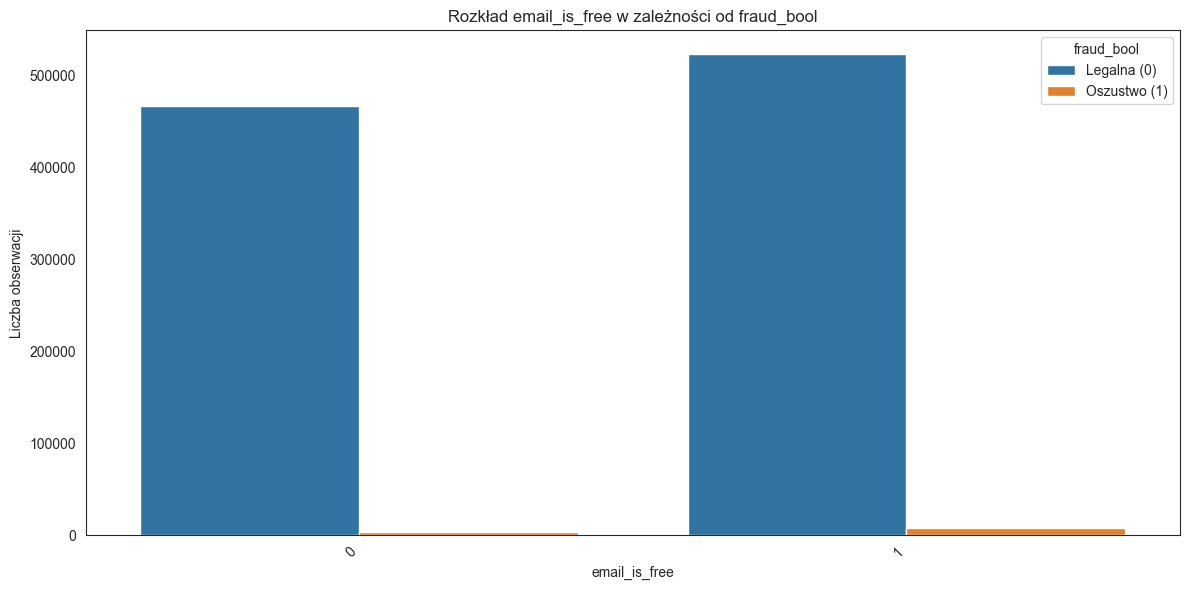

--------------------------------------------------

Cecha kategoryczna: housing_status
Tabele liczebności (globalnie):
housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64

Tabele liczebności dla 'housing_status' vs 'fraud_bool':
fraud_bool           0     1
housing_status              
BA              163318  6357
BB              259397  1568
BC              369855  2288
BD               25935   226
BE              168553   582
BF                1662     7
BG                 251     1


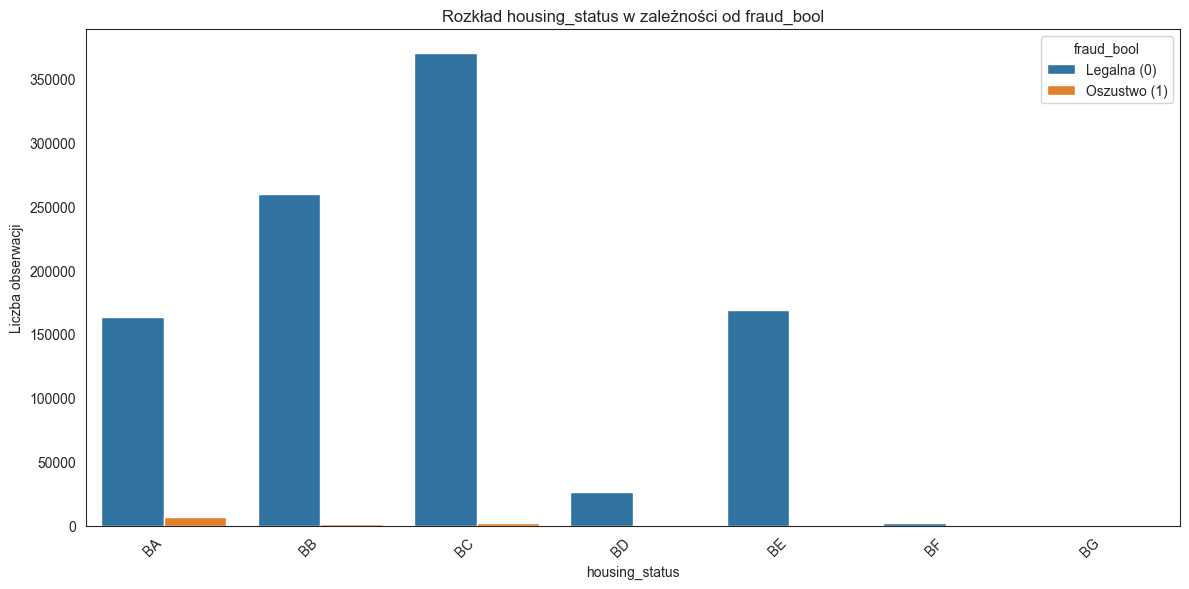

--------------------------------------------------

Cecha kategoryczna: phone_home_valid
Tabele liczebności (globalnie):
phone_home_valid
0    582923
1    417077
Name: count, dtype: int64

Tabele liczebności dla 'phone_home_valid' vs 'fraud_bool':
fraud_bool             0     1
phone_home_valid              
0                 574685  8238
1                 414286  2791


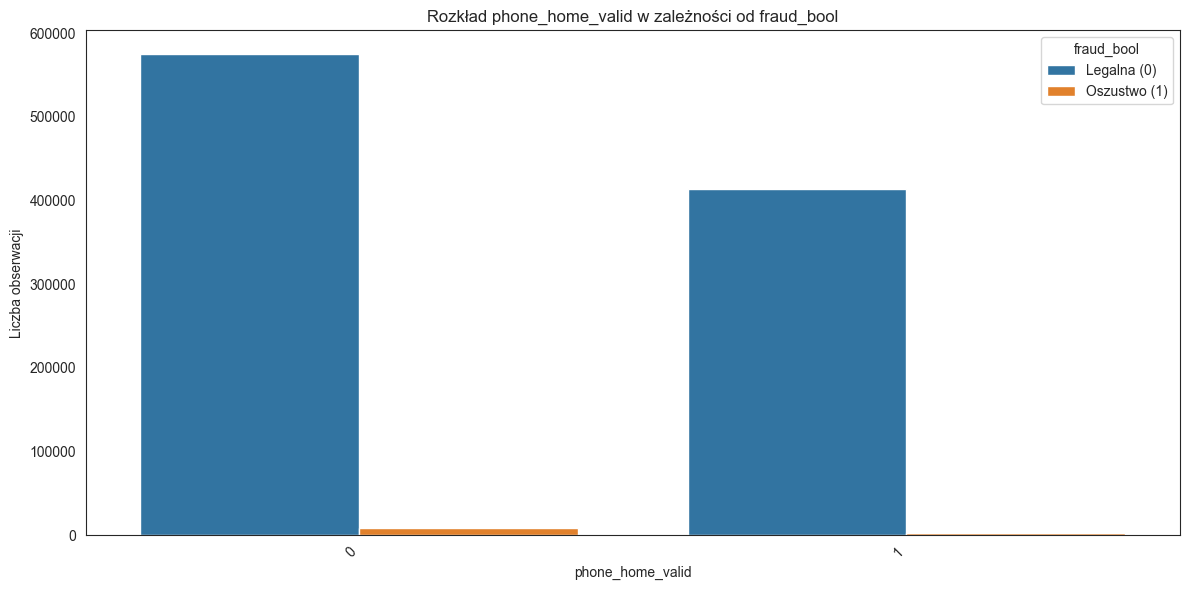

--------------------------------------------------

Cecha kategoryczna: phone_mobile_valid
Tabele liczebności (globalnie):
phone_mobile_valid
1    889676
0    110324
Name: count, dtype: int64

Tabele liczebności dla 'phone_mobile_valid' vs 'fraud_bool':
fraud_bool               0     1
phone_mobile_valid              
0                   108676  1648
1                   880295  9381


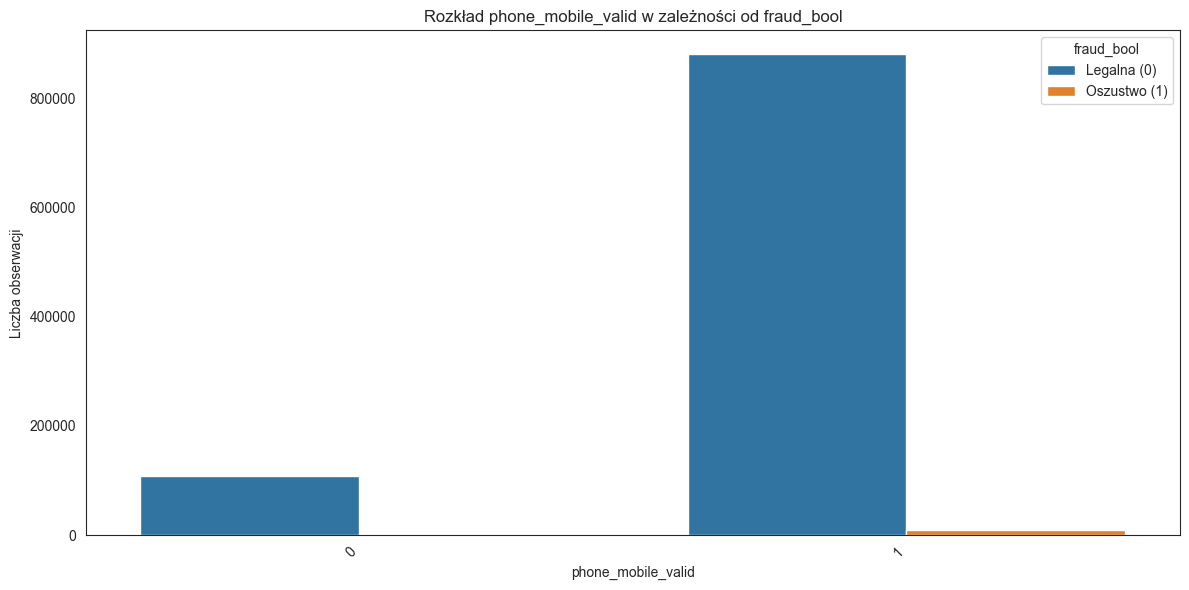

--------------------------------------------------

Cecha kategoryczna: has_other_cards
Tabele liczebności (globalnie):
has_other_cards
0    777012
1    222988
Name: count, dtype: int64

Tabele liczebności dla 'has_other_cards' vs 'fraud_bool':
fraud_bool            0      1
has_other_cards               
0                766914  10098
1                222057    931


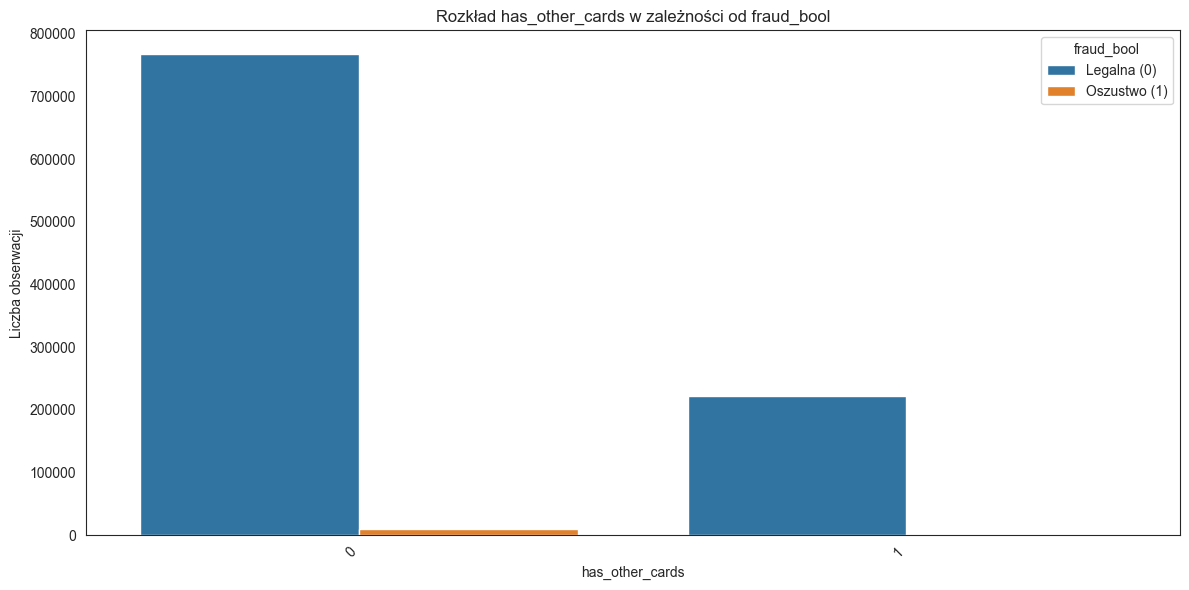

--------------------------------------------------

Cecha kategoryczna: foreign_request
Tabele liczebności (globalnie):
foreign_request
0    974758
1     25242
Name: count, dtype: int64

Tabele liczebności dla 'foreign_request' vs 'fraud_bool':
fraud_bool            0      1
foreign_request               
0                964284  10474
1                 24687    555


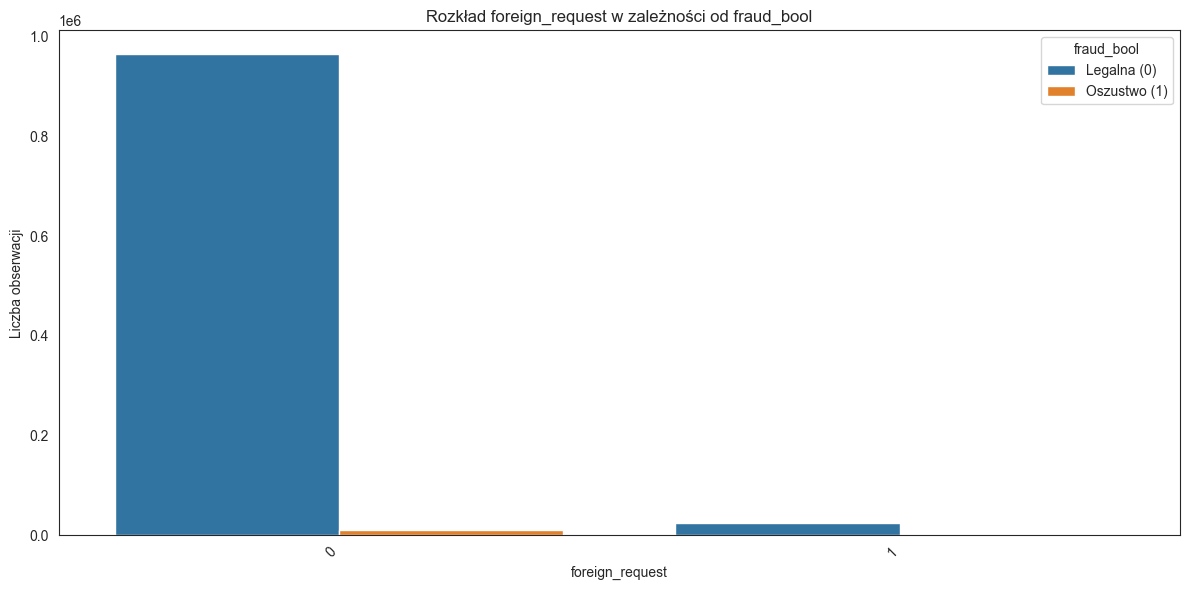

--------------------------------------------------

Cecha kategoryczna: source
Tabele liczebności (globalnie):
source
INTERNET    992952
TELEAPP       7048
Name: count, dtype: int64

Tabele liczebności dla 'source' vs 'fraud_bool':
fraud_bool       0      1
source                   
INTERNET    982035  10917
TELEAPP       6936    112


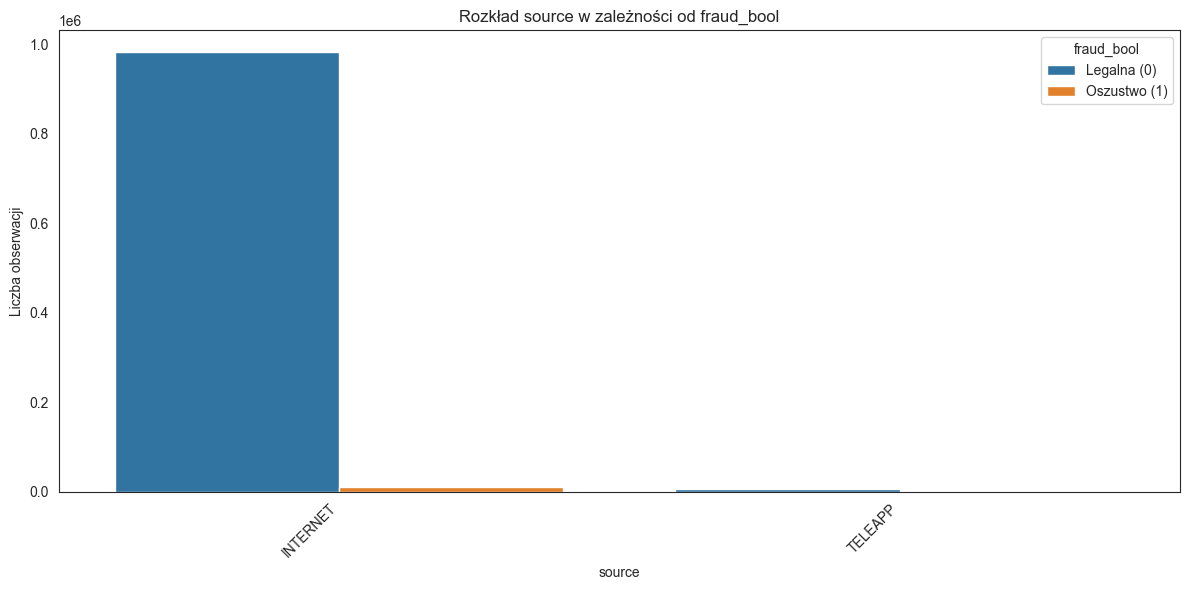

--------------------------------------------------

Cecha kategoryczna: device_os
Tabele liczebności (globalnie):
device_os
other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: count, dtype: int64

Tabele liczebności dla 'device_os' vs 'fraud_bool':
fraud_bool       0     1
device_os               
linux       330997  1715
macintosh    53074   752
other       340754  1974
windows     256999  6507
x11           7147    81


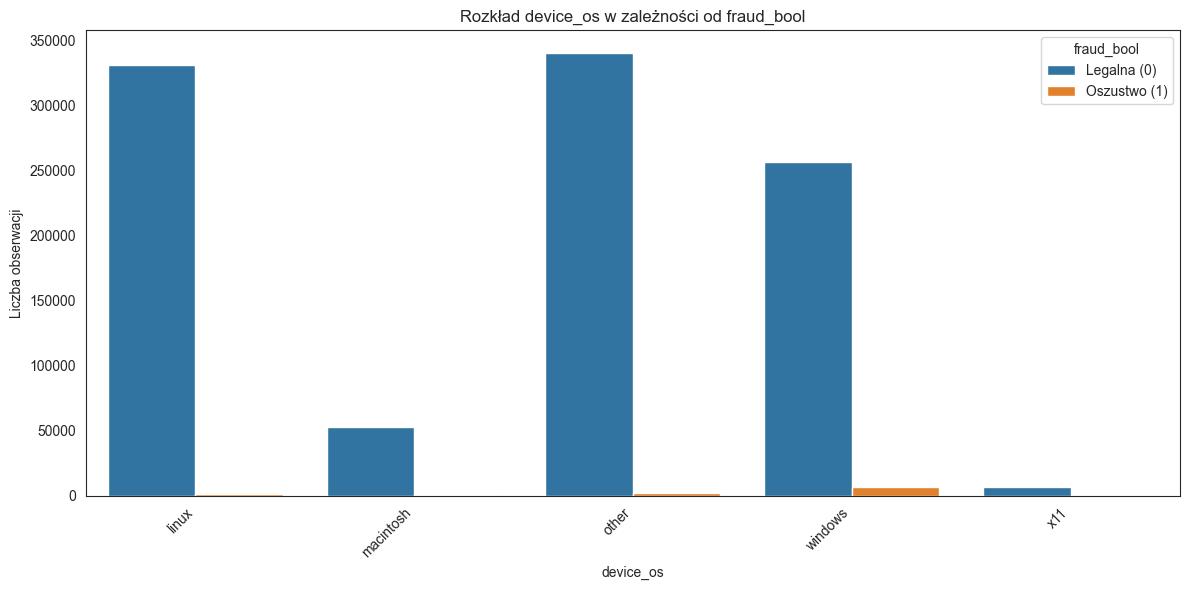

--------------------------------------------------

Cecha kategoryczna: keep_alive_session
Tabele liczebności (globalnie):
keep_alive_session
1    576947
0    423053
Name: count, dtype: int64

Tabele liczebności dla 'keep_alive_session' vs 'fraud_bool':
fraud_bool               0     1
keep_alive_session              
0                   415792  7261
1                   573179  3768


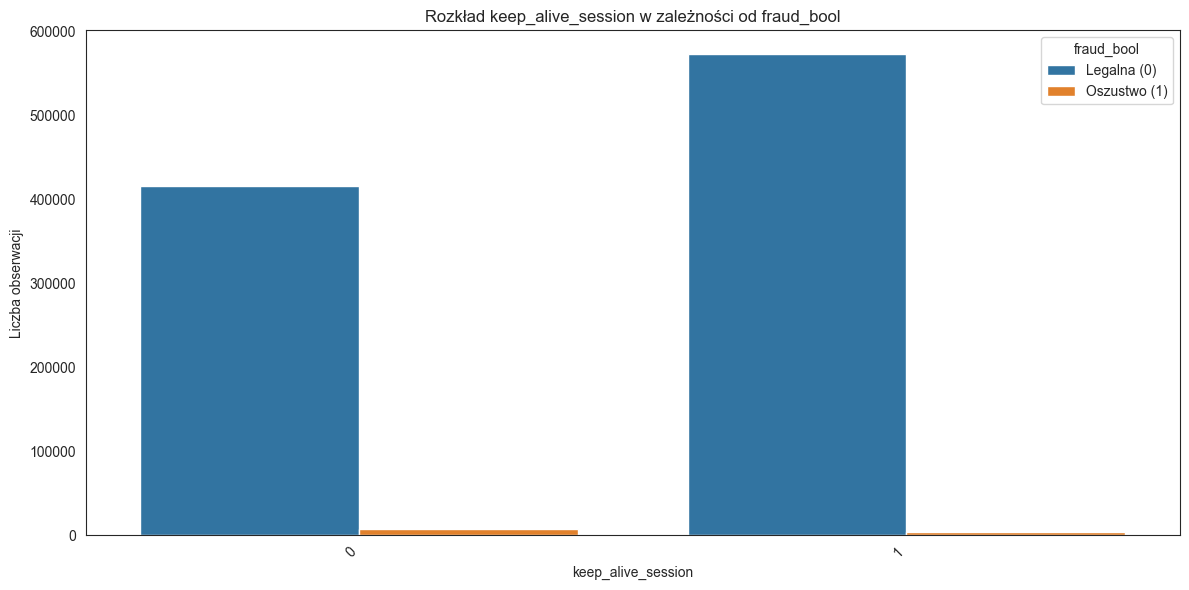

--------------------------------------------------


In [11]:
# 4. Analiza Poszczególnych Cech (Univariate Analysis) w Kontekście Zmiennej Celu
print(f"\n--- 4. Analiza Poszczególnych Cech w Kontekście Zmiennej Celu ('{target_variable}') ---")

if target_variable in df.columns:
    # Dla cech numerycznych
    print("\nAnaliza cech numerycznych:")
    for col in numerical_features:
        if col in df.columns and col != target_variable:
            print(f"\nCecha numeryczna: {col}")

            # Statystyki opisowe globalnie i dla każdej klasy
            print("Statystyki opisowe:")
            desc_stats = df.groupby(target_variable)[col].describe()
            print(desc_stats)
            if col == "days_since_request":
                continue
            # Wizualizacje
            plt.figure(figsize=(14, 5))

            # Histogramy
            plt.subplot(1, 3, 1)
            sns.histplot(data=df, x=col, hue=target_variable, kde=True, multiple="stack")
            plt.title(f'Histogram: {col} vs {target_variable}')

            # Wykresy gęstości
            plt.subplot(1, 3, 2)
            sns.kdeplot(data=df, x=col, hue=target_variable, fill=True, common_norm=False)
            plt.title(f'Wykres gęstości: {col} vs {target_variable}')

            # Box-ploty
            plt.subplot(1, 3, 3)
            sns.boxplot(data=df, x=target_variable, y=col, hue=target_variable, legend=False)
            plt.title(f'Wykres pudełkowy: {col} vs {target_variable}')
            plt.xticks([0, 1], ['Legalna (0)', 'Oszustwo (1)'])

            plt.tight_layout()
            plt.show()
            print("-" * 50)

    # Dla cech kategorycznych
    print("\nAnaliza cech kategorycznych:")
    for col in categorical_features:
        if col in df.columns and col != target_variable:
            print(f"\nCecha kategoryczna: {col}")

            # Tabele liczebności
            print("Tabele liczebności (globalnie):")
            print(df[col].value_counts())
            print(f"\nTabele liczebności dla '{col}' vs '{target_variable}':")
            contingency_table = pd.crosstab(df[col], df[target_variable])
            print(contingency_table)

            # Wizualizacje (wykresy słupkowe)
            plt.figure(figsize=(12, 6))
            sns.countplot(data=df, x=col, hue=target_variable, dodge=True)
            plt.title(f'Rozkład {col} w zależności od {target_variable}')
            plt.ylabel('Liczba obserwacji')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title=target_variable, labels=['Legalna (0)', 'Oszustwo (1)'])
            plt.tight_layout()
            plt.show()
            print("-" * 50)
else:
    print(
        f"Nie można przeprowadzić analizy cech w kontekście zmiennej celu, ponieważ zmienna '{target_variable}' nie istnieje.")



--- 5. Analiza Zależności Między Cechami ---

Macierz korelacji dla cech numerycznych:


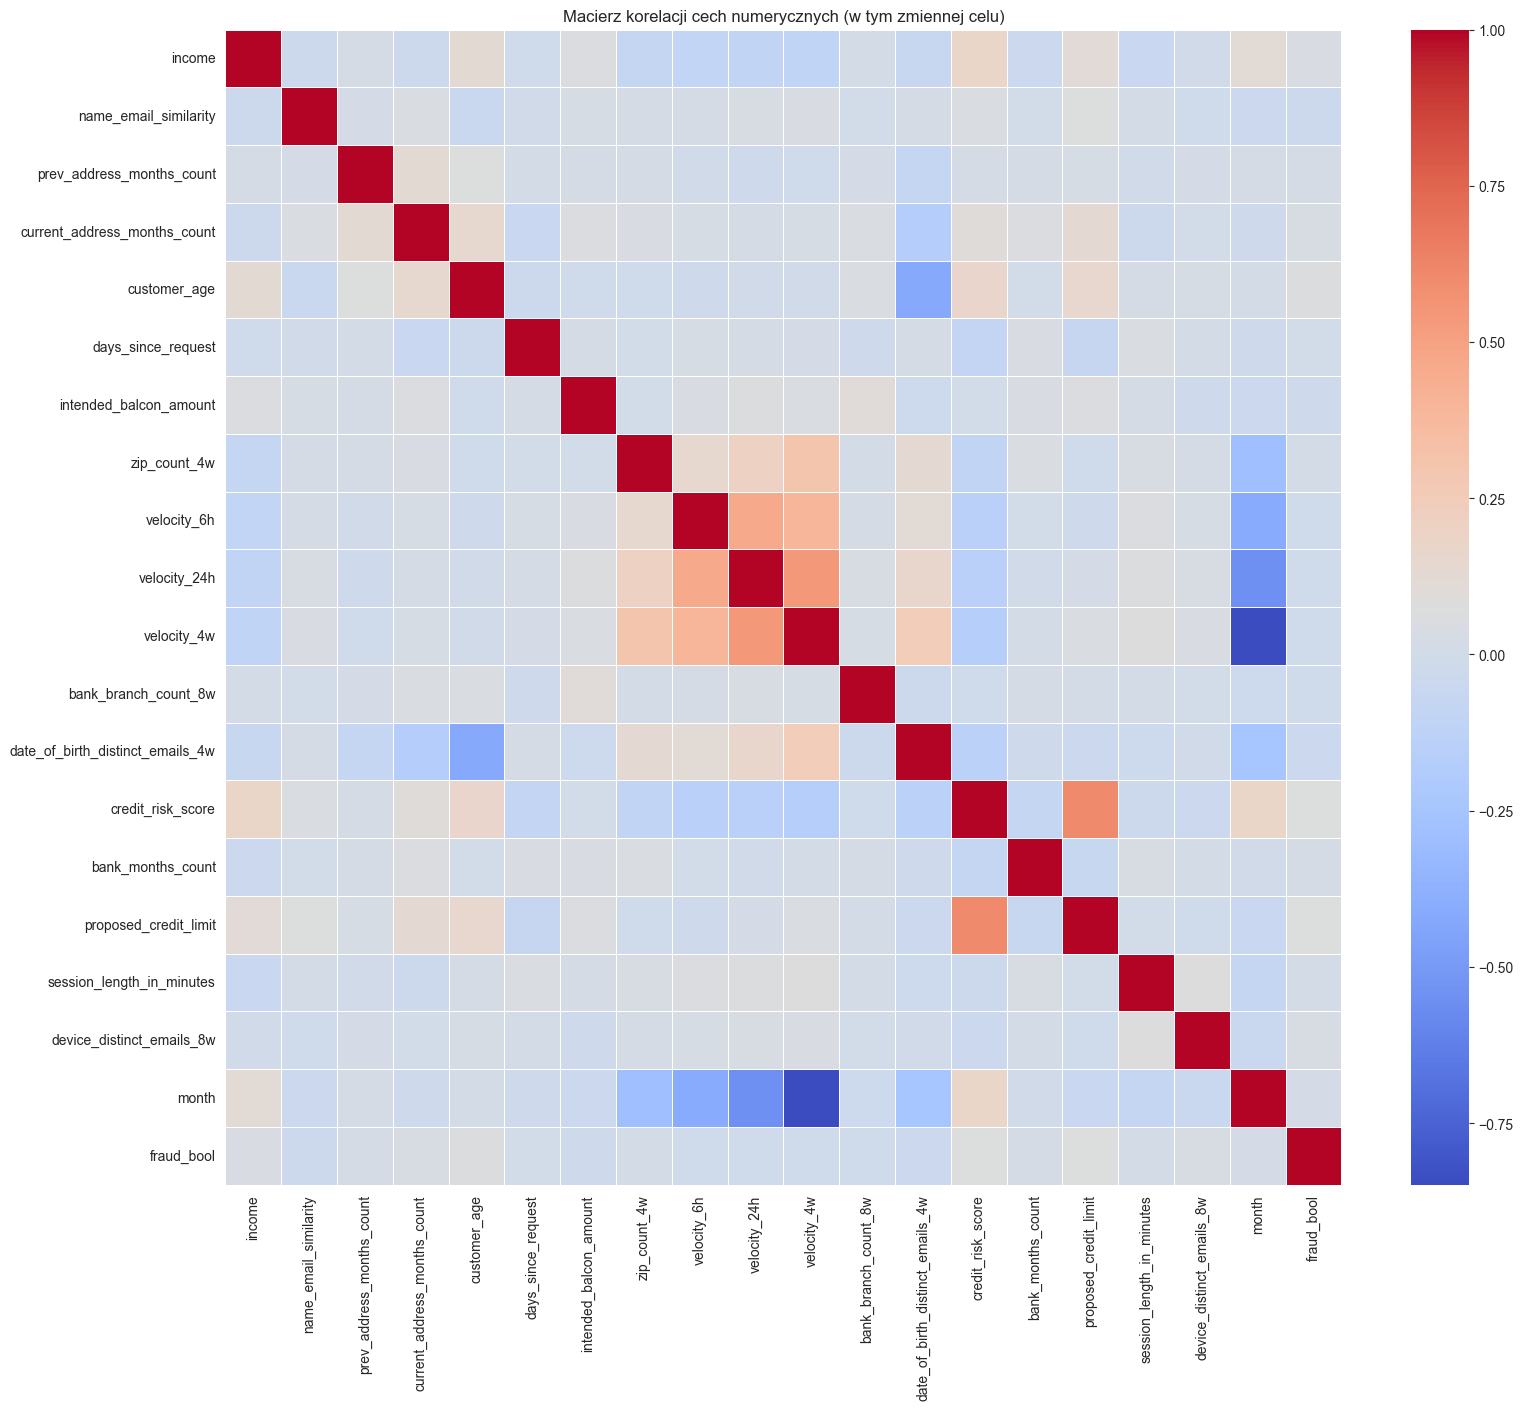


Korelacje cech numerycznych ze zmienną celu:
fraud_bool                          1.000000
credit_risk_score                   0.070624
proposed_credit_limit               0.068907
customer_age                        0.062959
income                              0.045079
device_distinct_emails_8w           0.035704
current_address_months_count        0.033480
bank_months_count                   0.020929
prev_address_months_count           0.020083
month                               0.013250
session_length_in_minutes           0.008999
zip_count_4w                        0.005212
days_since_request                  0.000567
velocity_24h                       -0.011183
velocity_4w                        -0.011536
bank_branch_count_8w               -0.011577
velocity_6h                        -0.016892
intended_balcon_amount             -0.024524
name_email_similarity              -0.036720
date_of_birth_distinct_emails_4w   -0.043224
Name: fraud_bool, dtype: float64


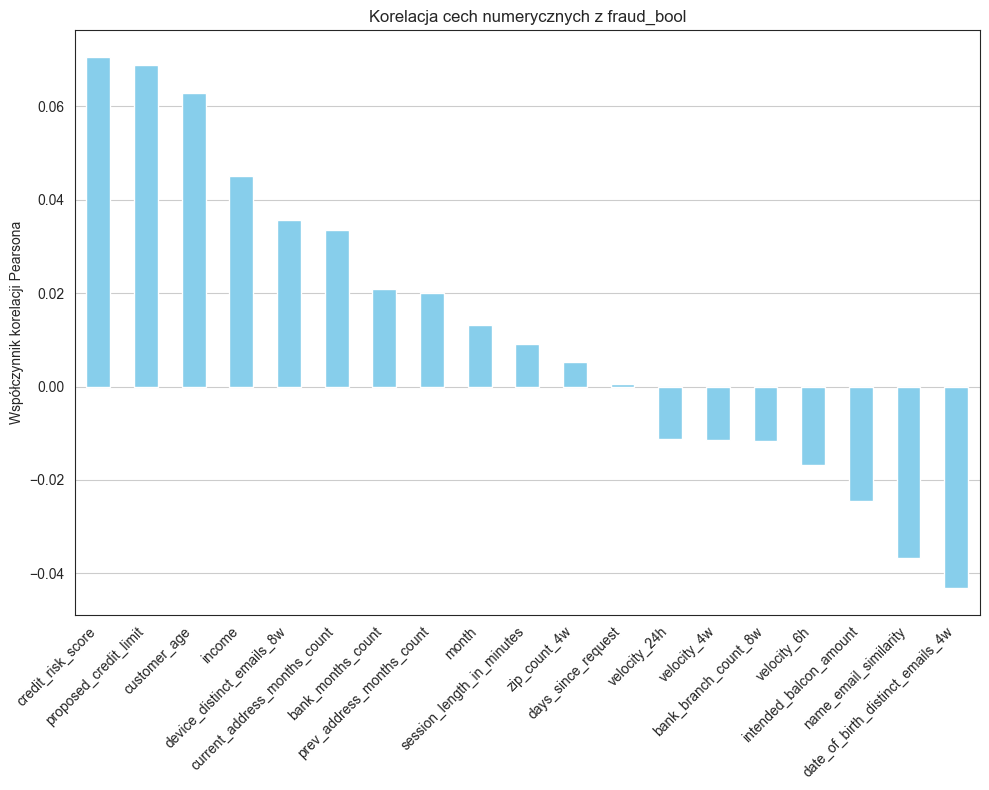


Przykładowe wykresy rozrzutu dla par cech numerycznych (kolorowane wg zmiennej celu):
Wybrane cechy do scatter plot: credit_risk_score vs proposed_credit_limit


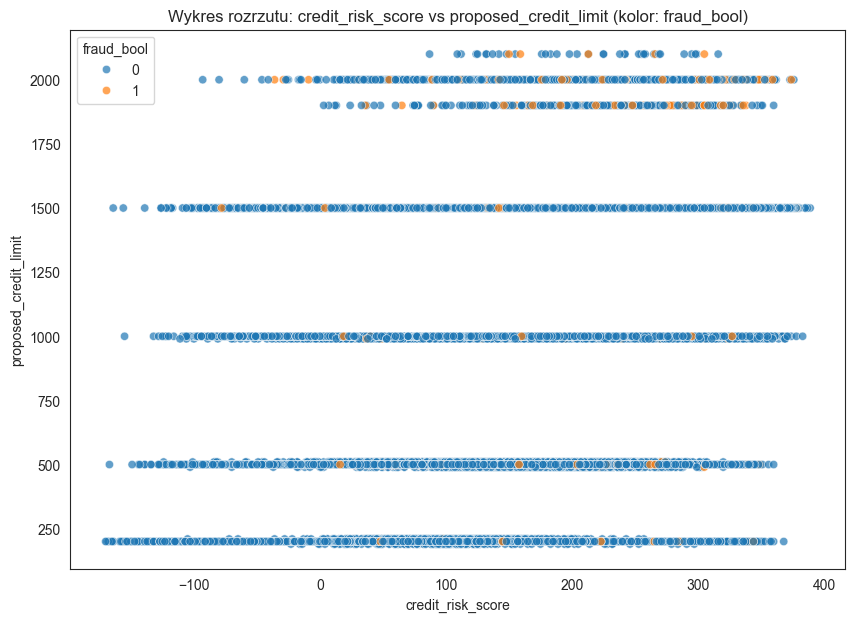

In [12]:
# 5. Analiza Zależności Między Cechami (Bivariate/Multivariate Analysis)
print("\n--- 5. Analiza Zależności Między Cechami ---")

if target_variable in df.columns:
    # Korelacje dla cech numerycznych
    print("\nMacierz korelacji dla cech numerycznych:")
    numerical_df_for_corr = df[numerical_features + [target_variable]] if target_variable in numerical_features else df[
        numerical_features].copy()
    if target_variable not in numerical_df_for_corr and target_variable in df.columns:  # Upewnijmy się, że target jest w df do korelacji
        numerical_df_for_corr[target_variable] = df[target_variable]

    correlation_matrix = numerical_df_for_corr.corr()
    plt.figure(figsize=(18, 15))  # Zwiększony rozmiar dla lepszej czytelności
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f",
                linewidths=.5)  # annot=False, bo może być za dużo liczb
    plt.title('Macierz korelacji cech numerycznych (w tym zmiennej celu)')
    plt.show()

    print("\nKorelacje cech numerycznych ze zmienną celu:")
    if target_variable in correlation_matrix.columns:
        target_correlations = correlation_matrix[target_variable].sort_values(ascending=False)
        print(target_correlations)
        # Wizualizacja korelacji z celem
        plt.figure(figsize=(10, 8))
        target_correlations.drop(target_variable).plot(kind='bar', color='skyblue')  # Usunięcie korelacji samej ze sobą
        plt.title(f'Korelacja cech numerycznych z {target_variable}')
        plt.ylabel('Współczynnik korelacji Pearsona')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Zmienna celu '{target_variable}' nie została uwzględniona w macierzy korelacji cech numerycznych.")

    # Wykresy rozrzutu dla wybranych par cech numerycznych
    print("\nPrzykładowe wykresy rozrzutu dla par cech numerycznych (kolorowane wg zmiennej celu):")
    if len(numerical_features) >= 2:
        # Wybierzmy kilka cech, które wykazały jakąś korelację z celem lub są interesujące
        # Na przykład, weźmy pierwsze 2-3 cechy z listy `numerical_features` lub te z najwyższą korelacją
        if 'target_correlations' in locals() and not target_correlations.empty:
            # Weźmy cechy o najwyższej (co do wartości bezwzględnej) korelacji, pomijając samą zmienną celu
            strongest_predictors = target_correlations.drop(target_variable).abs().nlargest(3).index.tolist()
            if len(strongest_predictors) < 2 and len(
                    numerical_features) >= 2:  # Jeśli nie ma silnych, weźmy pierwsze dwie
                strongest_predictors = numerical_features[:2]
            elif len(strongest_predictors) == 0 and len(numerical_features) >= 1:
                strongest_predictors = numerical_features[:1]  # W razie czego tylko jedna cecha
        elif len(numerical_features) >= 2:
            strongest_predictors = numerical_features[:2]
        elif len(numerical_features) == 1:
            strongest_predictors = numerical_features[:1]
        else:
            strongest_predictors = []

        if len(strongest_predictors) >= 2:
            print(f"Wybrane cechy do scatter plot: {strongest_predictors[0]} vs {strongest_predictors[1]}")
            plt.figure(figsize=(10, 7))
            sns.scatterplot(data=df, x=strongest_predictors[0], y=strongest_predictors[1], hue=target_variable,
                            alpha=0.7)
            plt.title(
                f'Wykres rozrzutu: {strongest_predictors[0]} vs {strongest_predictors[1]} (kolor: {target_variable})')
            plt.show()
        elif len(strongest_predictors) == 1:
            print(
                f"Wybrano tylko jedną cechę numeryczną '{strongest_predictors[0]}' dla scatter plot, potrzebne są co najmniej dwie.")
        else:
            print("Brak wystarczającej liczby cech numerycznych do stworzenia wykresu rozrzutu.")
    else:
        print("Niewystarczająca liczba cech numerycznych do stworzenia wykresów rozrzutu.")
else:
    print(f"Nie można przeprowadzić analizy zależności, ponieważ zmienna celu '{target_variable}' nie istnieje.")



--- 6. Ocena Jakości Danych ---

Analiza braków danych:
Cechy z brakującymi wartościami:
                              Liczba braków  Procent braków (%)
prev_address_months_count            712920             71.2920
bank_months_count                    253635             25.3635
current_address_months_count           4254              0.4254


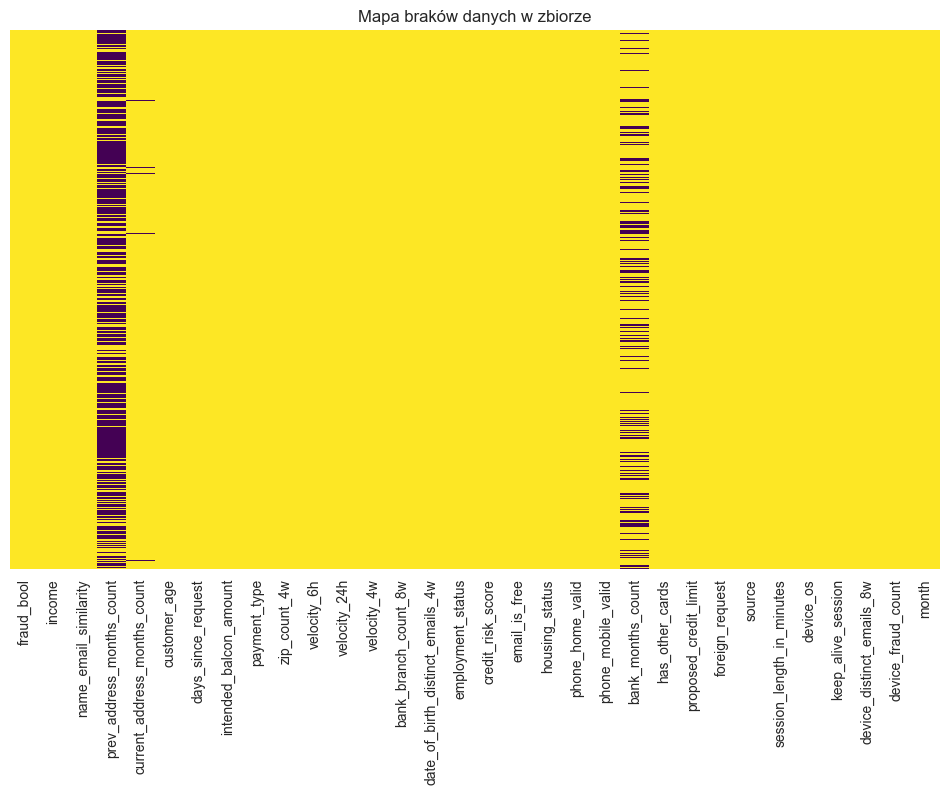


Potencjalne strategie radzenia sobie z brakami:
- Usunięcie wierszy/kolumn (jeśli procent braków jest bardzo mały/duży i nie wpływa to znacząco na dane).
- Imputacja: zastąpienie braków wartościami (np. średnią, medianą dla cech numerycznych; modą dla kategorycznych; lub bardziej zaawansowane metody jak KNNImputer, MICE).
- Stworzenie wskaźnika braku danych (np. nowa cecha binarna wskazująca, czy wartość była brakująca).
Wybór strategii zależy od charakteru danych i skali problemu.


In [13]:
# 6. Ocena Jakości Danych
print("\n--- 6. Ocena Jakości Danych ---")

# Braki danych (Missing Values)
print("\nAnaliza braków danych:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data_summary = pd.DataFrame({'Liczba braków': missing_values, 'Procent braków (%)': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Liczba braków'] > 0].sort_values(
    by='Procent braków (%)', ascending=False)

if not missing_data_summary.empty:
    print("Cechy z brakującymi wartościami:")
    print(missing_data_summary)

    # Wizualizacja braków danych
    plt.figure(figsize=(12, 7))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis_r', yticklabels=False)
    plt.title('Mapa braków danych w zbiorze')
    plt.show()

    print("\nPotencjalne strategie radzenia sobie z brakami:")
    print("- Usunięcie wierszy/kolumn (jeśli procent braków jest bardzo mały/duży i nie wpływa to znacząco na dane).")
    print(
        "- Imputacja: zastąpienie braków wartościami (np. średnią, medianą dla cech numerycznych; modą dla kategorycznych; lub bardziej zaawansowane metody jak KNNImputer, MICE).")
    print("- Stworzenie wskaźnika braku danych (np. nowa cecha binarna wskazująca, czy wartość była brakująca).")
    print("Wybór strategii zależy od charakteru danych i skali problemu.")
else:
    print("Brak brakujących wartości w danych (poza celowym zastąpieniem -1 przez NaN).")



In [15]:
# Kardynalność cech kategorycznych
print("\nKardynalność cech kategorycznych:")
high_cardinality_threshold = 20  # Próg dla wysokiej kardynalności (można dostosować)
for col in categorical_features:
    if col in df.columns:
        num_unique = df[col].nunique()
        print(f"- Cecha '{col}': {num_unique} unikalnych wartości.")
        if num_unique > high_cardinality_threshold:
            print(f"  UWAGA: Cecha '{col}' ma wysoką kardynalność ({num_unique}). Może to utrudnić modelowanie.")
            print(
                "  Rozważ: grupowanie kategorii, target encoding, usunięcie cechy lub użycie modeli dobrze radzących sobie z takimi cechami (np. drzewiaste).")




Kardynalność cech kategorycznych:
- Cecha 'payment_type': 5 unikalnych wartości.
- Cecha 'employment_status': 7 unikalnych wartości.
- Cecha 'email_is_free': 2 unikalnych wartości.
- Cecha 'housing_status': 7 unikalnych wartości.
- Cecha 'phone_home_valid': 2 unikalnych wartości.
- Cecha 'phone_mobile_valid': 2 unikalnych wartości.
- Cecha 'has_other_cards': 2 unikalnych wartości.
- Cecha 'foreign_request': 2 unikalnych wartości.
- Cecha 'source': 2 unikalnych wartości.
- Cecha 'device_os': 5 unikalnych wartości.
- Cecha 'keep_alive_session': 2 unikalnych wartości.
